In [1]:
import sys; sys.path.insert(0,'../')
from notebook_tools import *
%matplotlib inline

# load data

In [2]:
PmissBins   = [[0.3,0.45]  , [0.45,0.55] , [0.55,0.65]  , [0.65,0.75] , [0.75,1.0]]

cm_pars = dict()
ana_data = dict()
for target in ['C12','Al27','Fe56','Pb208']:
    cm_pars[target] = pd.read_csv( "/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/%s_dataCMparameters.csv"%target ) 
    ana_data[target] = TAnalysisEG2( "/Users/erezcohen/Desktop/DataMining/AnaFiles" ,  "Ana_ppSRCCut_DATA_%s"%target )

## 1 Pmiss Bins in transverse directions and 5 in longitudinal

In [4]:
sims = pd.concat([
        # with a cut on fit_sigma_std_ratio>0.75
    #         pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/Ntimes20_CutOnKurtosisSkewness_results_56322runs.csv')
        # with a cut on number of maxima == 1 in each PcmZ distribution
#         pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/simulation/runs_0_1000_simulationruns_results.csv')
#         pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/Ntimes20_CutNmax_results_679799runs.csv')
        pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/Ntimes20_CutNmax_OrTrees_results_20116runs.csv')

                  ])
print len(sims),'runs in the sample'

20116 runs in the sample


In [5]:
# sims=sims[sims['parameters_reconstructed_well']==True]
sims=sims[sims['parameters_reconstructed_well']!='0']
sims.fillna(0.0,inplace=True)
print len(sims),'runs in the sample'
for target in ['C12','Al27','Fe56','Pb208']:
    sims['ks_Pval_pcmX+pcmY+pcmZ_'+target] = sims['ks_local_Pval_pcmX_'+target]+sims['ks_local_Pval_pcmY_'+target]+sims['ks_local_Pval_pcmZ_'+target]
    sims['ks_Pval_(pcmX_pcmY)+pcmZ_'+target] = sims['ks_Pval_pcmX_pcmY_'+target]+sims['ks_local_Pval_pcmZ_'+target]
    print len(sims[sims['ks_Pval_pcmX_pcmY_pcmZ_'+target]>0]),'events with ks_Pval_pcmX_pcmY_pcmZ_%s>0'%target
    print len(sims[sims['ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_'+target]>0]),'events with ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_%s>0'%target


19064 runs in the sample
0 events with ks_Pval_pcmX_pcmY_pcmZ_C12>0
58 events with ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_C12>0
0 events with ks_Pval_pcmX_pcmY_pcmZ_Al27>0
1247 events with ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_Al27>0
0 events with ks_Pval_pcmX_pcmY_pcmZ_Fe56>0
61 events with ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_Fe56>0
0 events with ks_Pval_pcmX_pcmY_pcmZ_Pb208>0
3143 events with ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_Pb208>0


In [6]:
# sample = sims[(sims['ks_PvalTotal_C12']==0)&(sims['gen_SigmaX']>0.15)&(sims['gen_SigmaX']<0.16)]
target='C12'
sample = sims[sims['ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_'+target]>1e16]
sample[['run',
        'ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_'+target 
        ,'gen_SigmaX','gen_a1','gen_a2','gen_b1','gen_b2'
        ,'recMeanX','recSigmaX','ks_local_Pval_pcmX_'+target
        ,'recSigmaY','ks_local_Pval_pcmY_'+target
        ,'ks_local_Pval_pcmZ_'+target                                         
        ,'ks_Pval_pcmX_pcmY_pcmZ_'+target
        ,'recmean_z_bin0','recsigma_z_bin0','ks_local_Pval_pcmZ_bin0_'+target      
        ,'recmean_z_bin1','recsigma_z_bin1','ks_local_Pval_pcmZ_bin1_'+target
        ,'recmean_z_bin2','recsigma_z_bin2','ks_local_Pval_pcmZ_bin2_'+target
        ,'recmean_z_bin3','recsigma_z_bin3','ks_local_Pval_pcmZ_bin3_'+target
        ,'recmean_z_bin4','recsigma_z_bin4','ks_local_Pval_pcmZ_bin4_'+target
       ]]

,run,ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_C12,gen_SigmaX,gen_a1,gen_a2,gen_b1,gen_b2,recMeanX,recSigmaX,ks_local_Pval_pcmX_C12,...,ks_local_Pval_pcmZ_bin1_C12,recmean_z_bin2,recsigma_z_bin2,ks_local_Pval_pcmZ_bin2_C12,recmean_z_bin3,recsigma_z_bin3,ks_local_Pval_pcmZ_bin3_C12,recmean_z_bin4,recsigma_z_bin4,ks_local_Pval_pcmZ_bin4_C12
10828,61682,1.040269e+16,0.164871,0.443694,0.198635,0.651740,0.199912,-0.012423,0.179370,0.034670,...,0.062883,0.110530,0.148376,0.027821,0.165356,0.174978,0.330626,0.278863,0.202112,0.001332
12364,61773,1.617122e+16,0.135151,0.392067,0.194315,0.353308,0.215568,-0.017064,0.149578,0.135268,...,0.361991,0.111930,0.135987,0.036116,0.147296,0.165568,0.147826,0.233297,0.184721,0.000004
15685,20218,1.876997e+17,0.135407,0.296567,0.157897,0.677742,0.243033,-0.019885,0.152490,0.384262,...,0.118880,0.149053,0.117186,0.250353,0.204666,0.134180,0.057931,0.305513,0.165100,0.000303
23016,62161,8.209306e+16,0.169185,0.339810,0.190213,0.822991,0.246016,-0.011616,0.186051,0.008029,...,0.372007,0.147623,0.144331,0.690597,0.220218,0.167197,0.046492,0.319253,0.197730,0.013925
32329,44624,2.521589e+16,0.150043,0.134826,0.175768,0.698234,0.271815,-0.016026,0.168345,0.285536,...,0.095339,0.159549,0.128047,0.543306,0.227129,0.137969,0.003189,0.352499,0.156800,0.003695
83891,14388,2.798137e+17,0.149539,0.346178,0.180241,0.611710,0.245447,-0.016904,0.166884,0.208337,...,0.052130,0.141842,0.129841,0.390236,0.200196,0.157928,0.239352,0.277370,0.180443,0.000089
83968,14494,6.812202e+16,0.156924,0.167115,0.154330,0.437015,0.192729,-0.018166,0.170654,0.281878,...,0.334738,0.129573,0.122080,0.072300,0.185100,0.137352,0.484396,0.263351,0.159228,0.000004
97639,33077,6.732906e+16,0.134488,0.366736,0.157813,0.641385,0.236484,-0.019811,0.150033,0.181865,...,0.128429,0.145324,0.113208,0.169019,0.197510,0.136628,0.129043,0.285038,0.173241,0.000044
108985,79386,2.746105e+17,0.154346,0.308581,0.146195,0.572105,0.198138,-0.017709,0.167508,0.155218,...,0.480557,0.141279,0.115823,0.248756,0.197152,0.139484,0.249480,0.275762,0.170625,0.000098
130091,10008,7.800312e+16,0.139476,0.100748,0.200622,0.075508,0.254827,-0.016747,0.156047,0.358241,...,0.281829,0.121470,0.138566,0.075554,0.181141,0.153993,0.513997,0.237954,0.171107,0.000002


## a1 vs. a2 - kill runs in which \sigma_z < 0

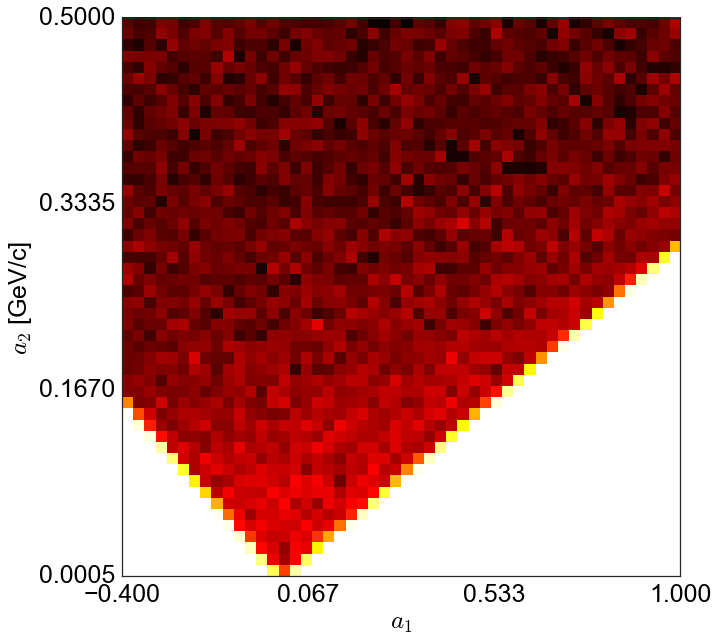

In [10]:
plot_2d_hist(sample['gen_a1'],sample['gen_a2'],xlabel='$a_1$',ylabel='$a_2$ [GeV/c]');

## sigma_t

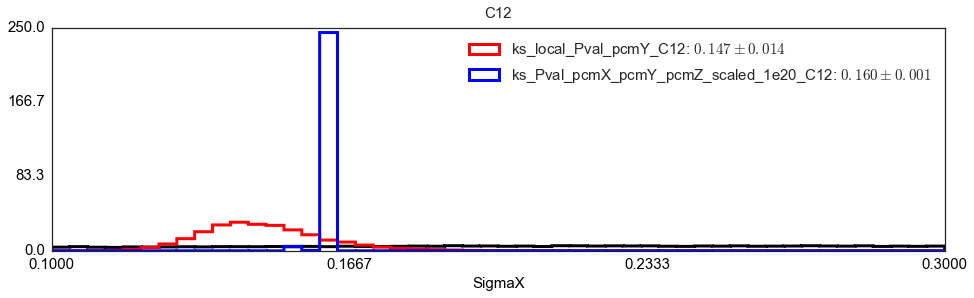

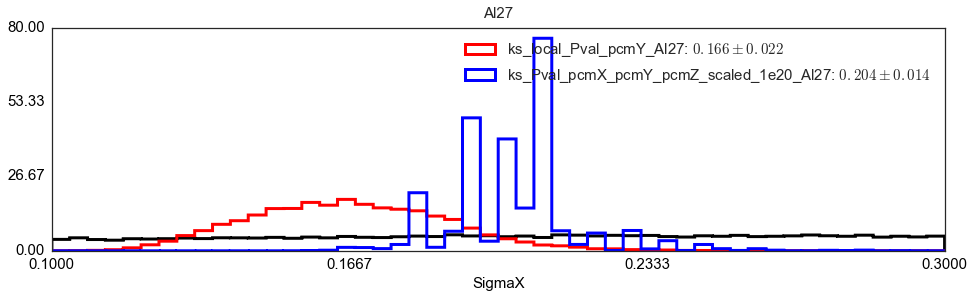

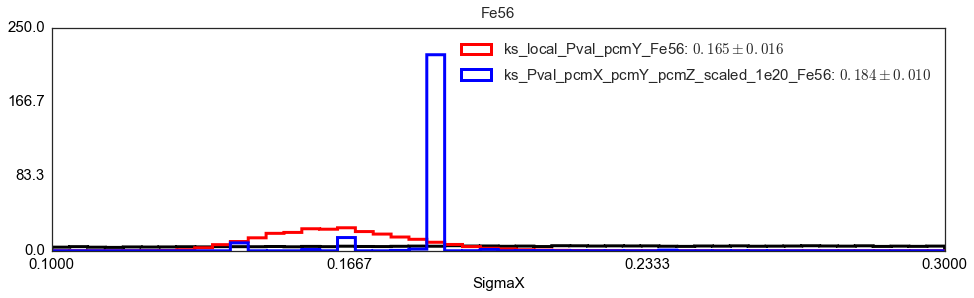

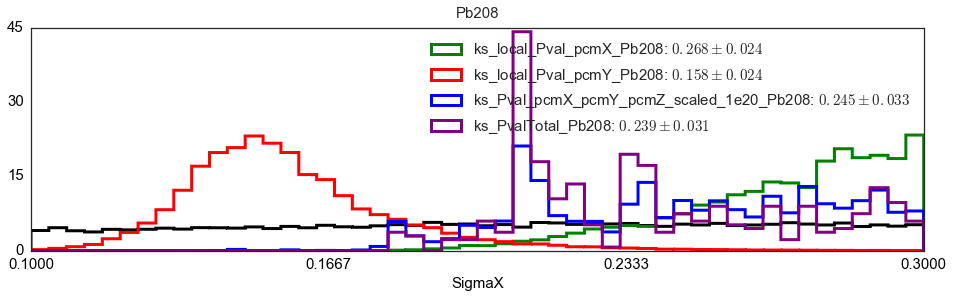

In [6]:
# sample = sims[(sims.run!=64864) & (sims.run!=1353)]
# sample = sims[sims['gen_b2']<0.25]
sample = sims

for target in ['C12','Al27','Fe56','Pb208']:    
    fig,ax = plt.subplots(figsize=(16,4))
    parameter = 'SigmaX'
    x = sample['gen_'+parameter] #     x = sample['rec'+parameter] 
    h,bins,_=plt.hist(x,bins=50,normed=1,histtype='step',linewidth=3,color='black')
    weights_array = ['ks_local_Pval_pcmX_'+target,'ks_local_Pval_pcmY_'+target
#                      ,'ks_Pval_pcmX_pcmY_'+target
#                      ,'ks_local_Pval_pcmZ_'+target
                     ,'ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_'+target
                     ,'ks_PvalTotal_'+target
#                      ,'ks_Pval_pcmX+pcmY+pcmZ_'+target,'ks_Pval_(pcmX_pcmY)+pcmZ_'+target,'ks_Pval_pcmX+pcmY+all_pcmZ_'+target
                    ] 
    colors = ['green','red','blue','purple','salmon','black','cyan','yellow']
    y_max,mu,sigma=0,[],[]
    for i,weights_name,color in zip(range(len(weights_array)),weights_array,colors):
        weights = sample[weights_name]
        if np.sum(weights)>0:
            mu.append(np.average(x , weights=weights))
            sigma.append(np.sqrt(np.average((x-mu[-1])**2, weights=weights)))
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1,histtype='step',linewidth=3,color=color,label=weights_name+': $%.3f\\pm%.3f$'%(mu[-1],sigma[-1]));
            if np.max(h)>y_max: y_max=np.max(h)
    ax.legend(loc='best',fontsize=15)
    set_axes(ax,x_label=parameter,fontsize=15)
    ax.set_title(target,fontsize=15,y=1.02)    

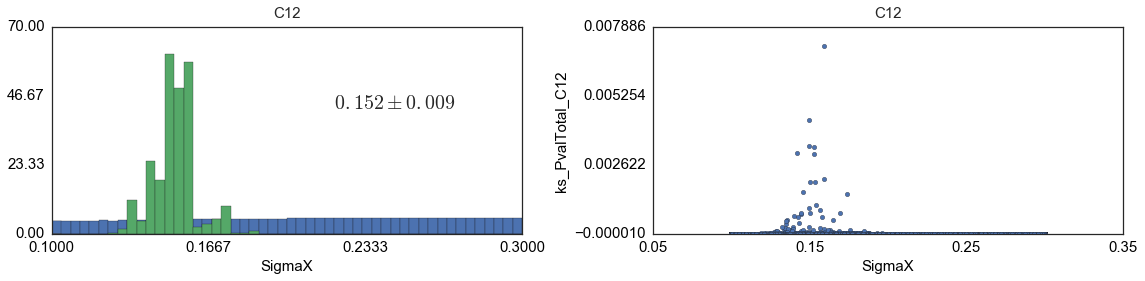

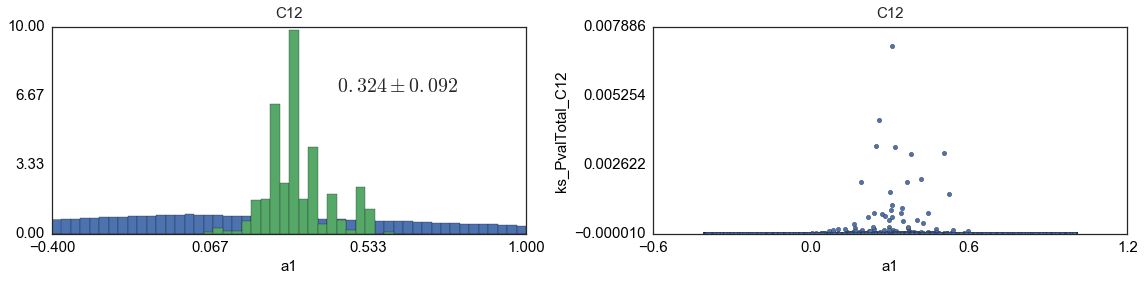

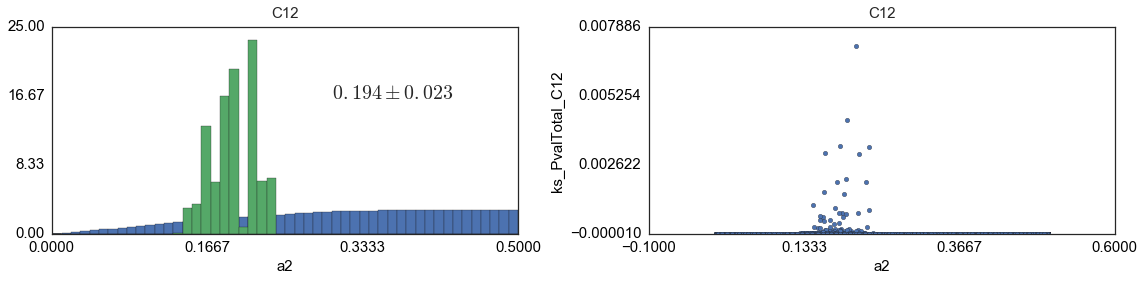

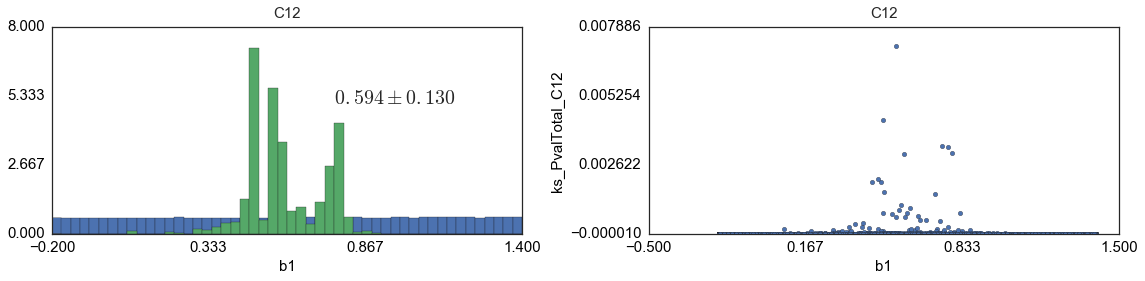

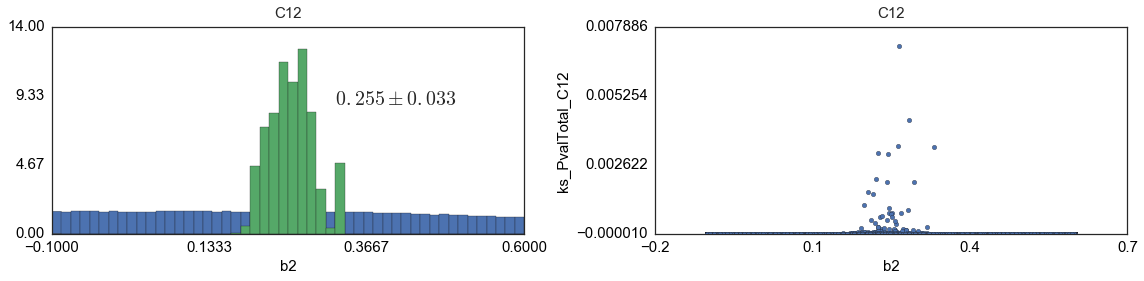

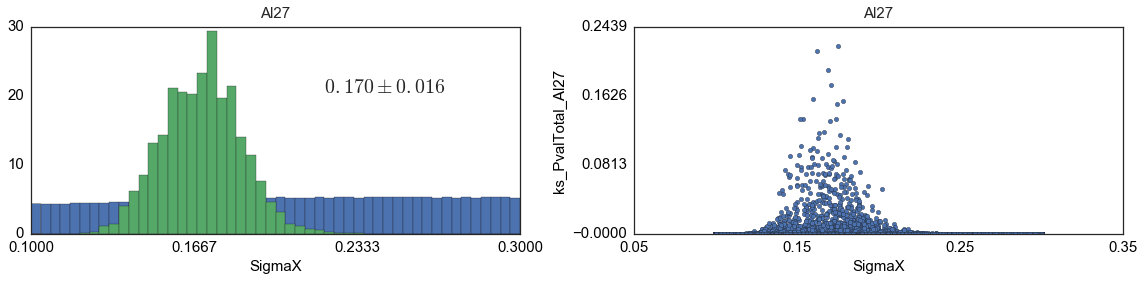

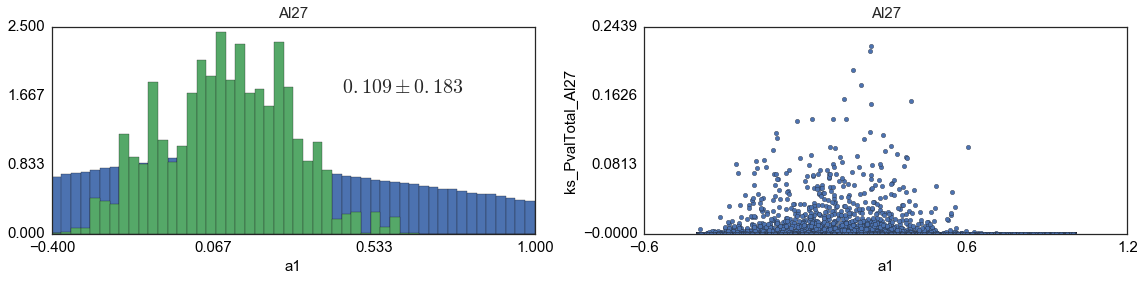

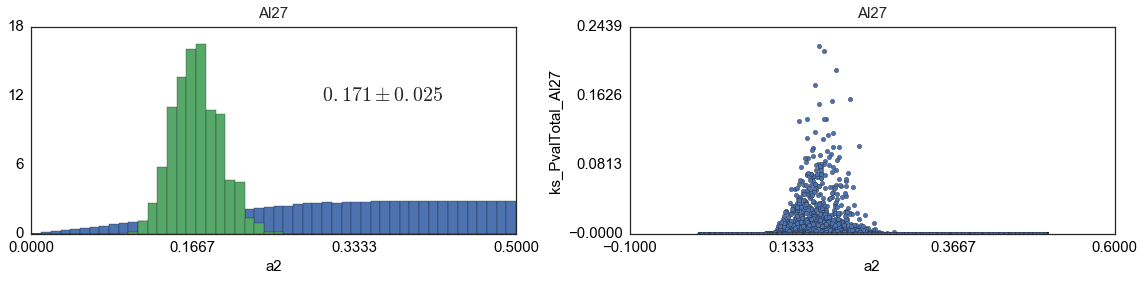

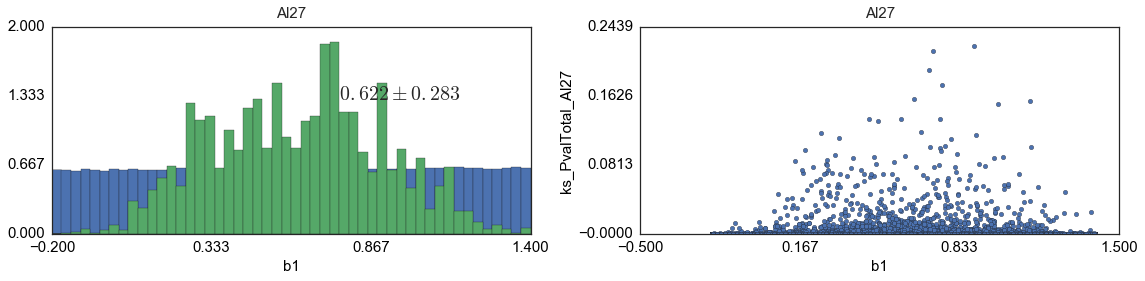

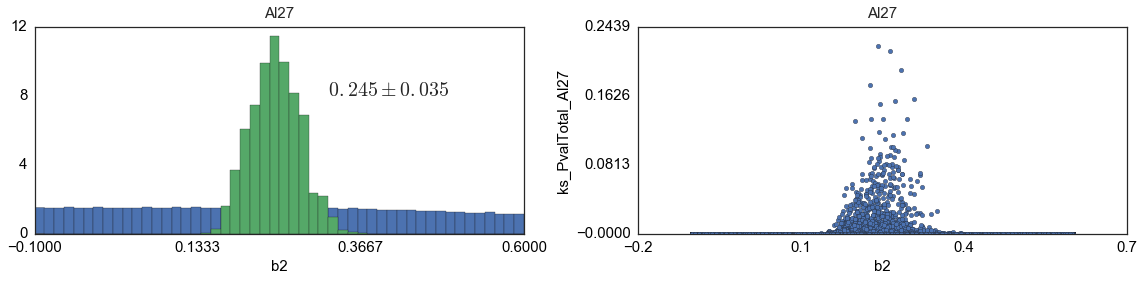

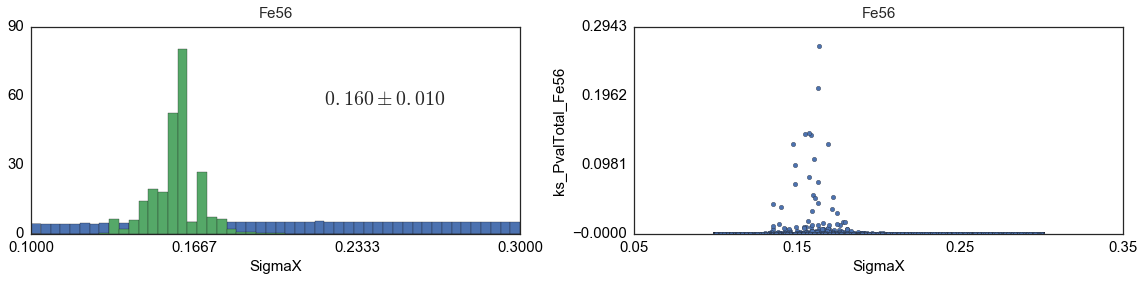

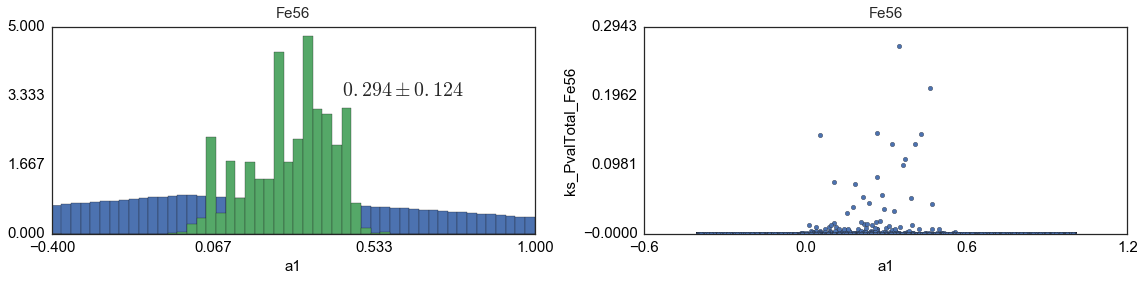

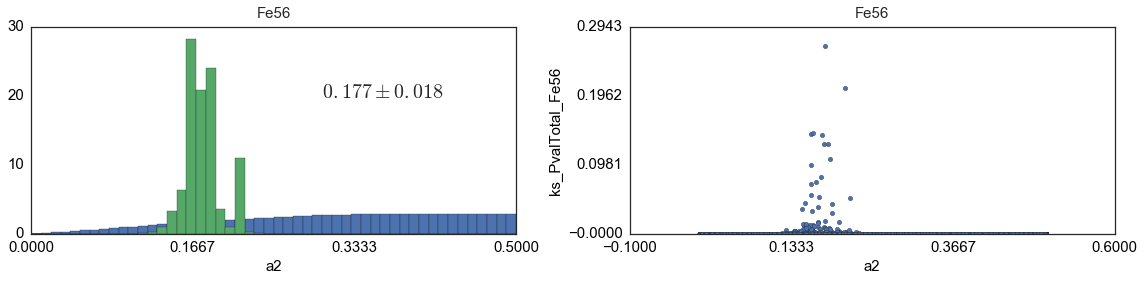

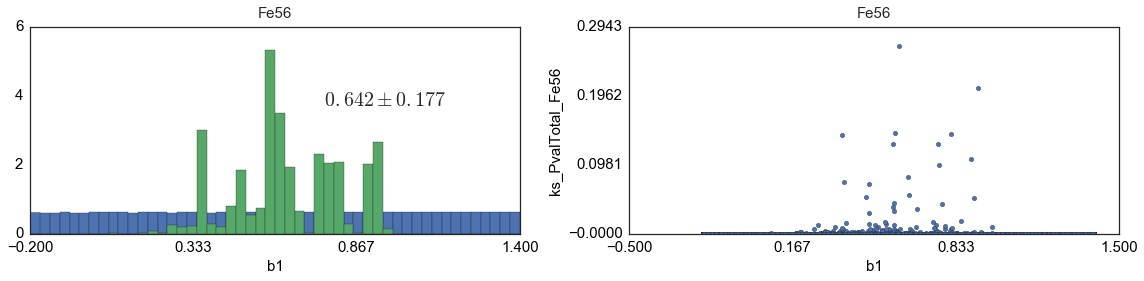

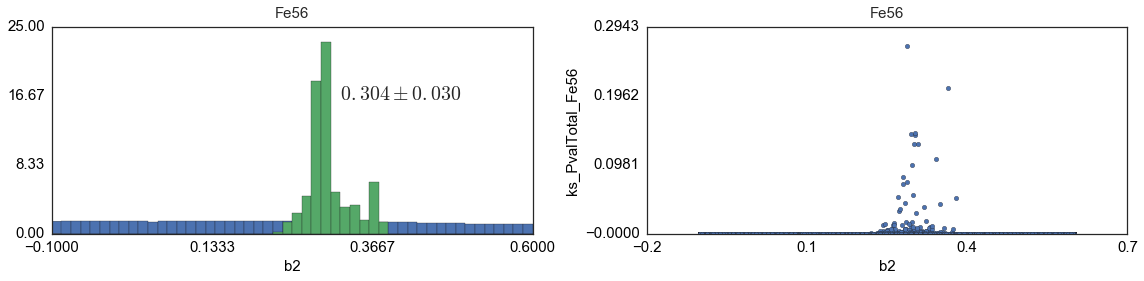

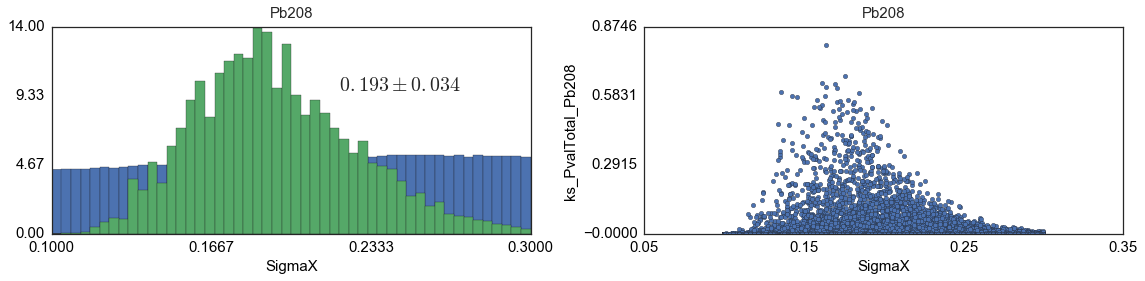

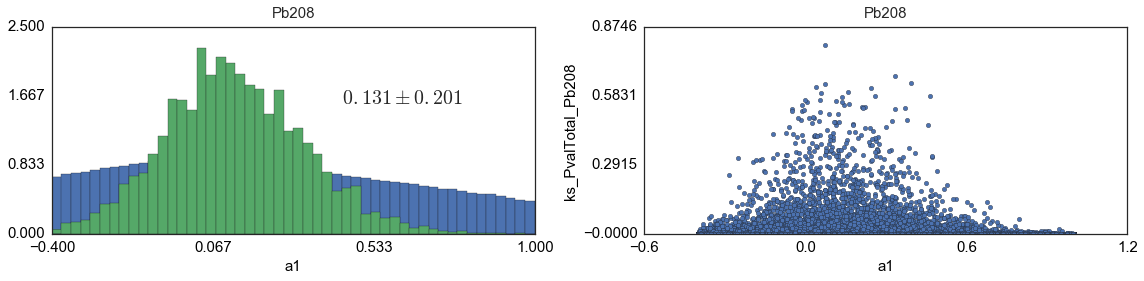

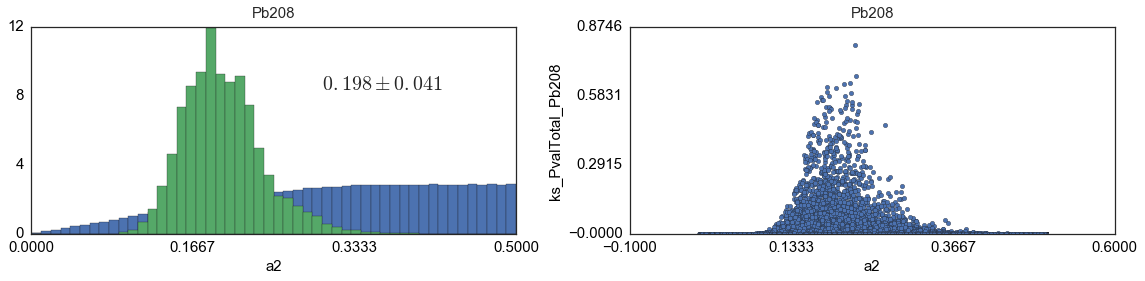

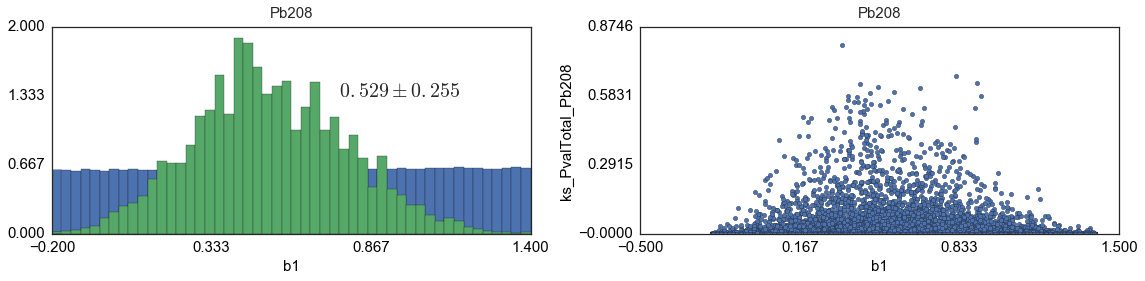

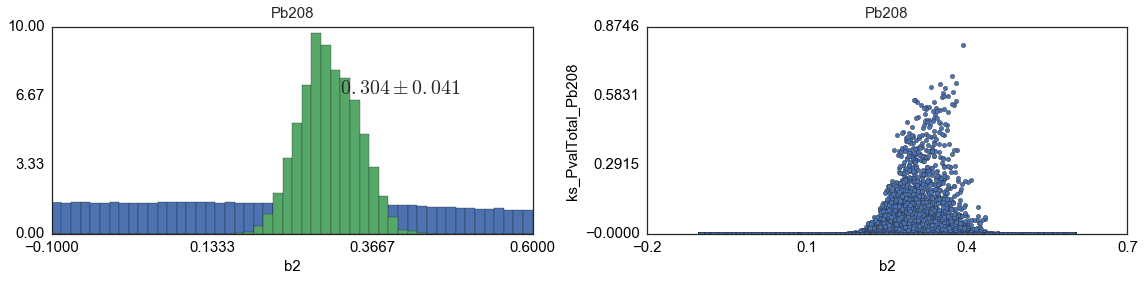

In [7]:
for target in ['C12','Al27','Fe56','Pb208']:
    for parameter in ['SigmaX','a1','a2','b1','b2']:
        var,w = parameter, 'ks_PvalTotal_'+target
        weights = sims[w]
        x = sims['gen_'+var]
        fig = plt.figure(figsize=(16,4))
        ax = fig.add_subplot(1,2,1)
        h,bins,_=plt.hist(x,bins=50,normed=1);
        if np.sum(weights)>0:
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1);            
            mu = np.average(sims['gen_'+var] , weights=weights)
            sigma = np.sqrt(np.average((sims['gen_'+var]-mu)**2, weights=weights))                                                                           
        set_axes(ax,x_label=var,fontsize=15)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.text(np.min(bins)+0.6*(np.max(bins)-np.min(bins)),0.7*np.max(h),'$%.3f\\pm%.3f$'%(mu,sigma),fontsize=20)
        ax = fig.add_subplot(1,2,2)
        ax.set_title(target,fontsize=15,y=1.02)
        plt.scatter(x,weights);
        set_axes(ax,x_label=var,y_label=w,fontsize=15)
        ax.set_ylim(np.min(weights)-0.00001,1.1*np.max(weights)+0.00001)
        plt.tight_layout()

0 SigmaX vs. a1
1 SigmaX vs. a2
2 SigmaX vs. b1
3 SigmaX vs. b2
4 a1 vs. a2
5 b1 vs. b2
0 SigmaX vs. a1
1 SigmaX vs. a2
2 SigmaX vs. b1
3 SigmaX vs. b2
4 a1 vs. a2
5 b1 vs. b2
0 SigmaX vs. a1
1 SigmaX vs. a2
2 SigmaX vs. b1
3 SigmaX vs. b2
4 a1 vs. a2
5 b1 vs. b2
0 SigmaX vs. a1
1 SigmaX vs. a2
2 SigmaX vs. b1
3 SigmaX vs. b2
4 a1 vs. a2
5 b1 vs. b2


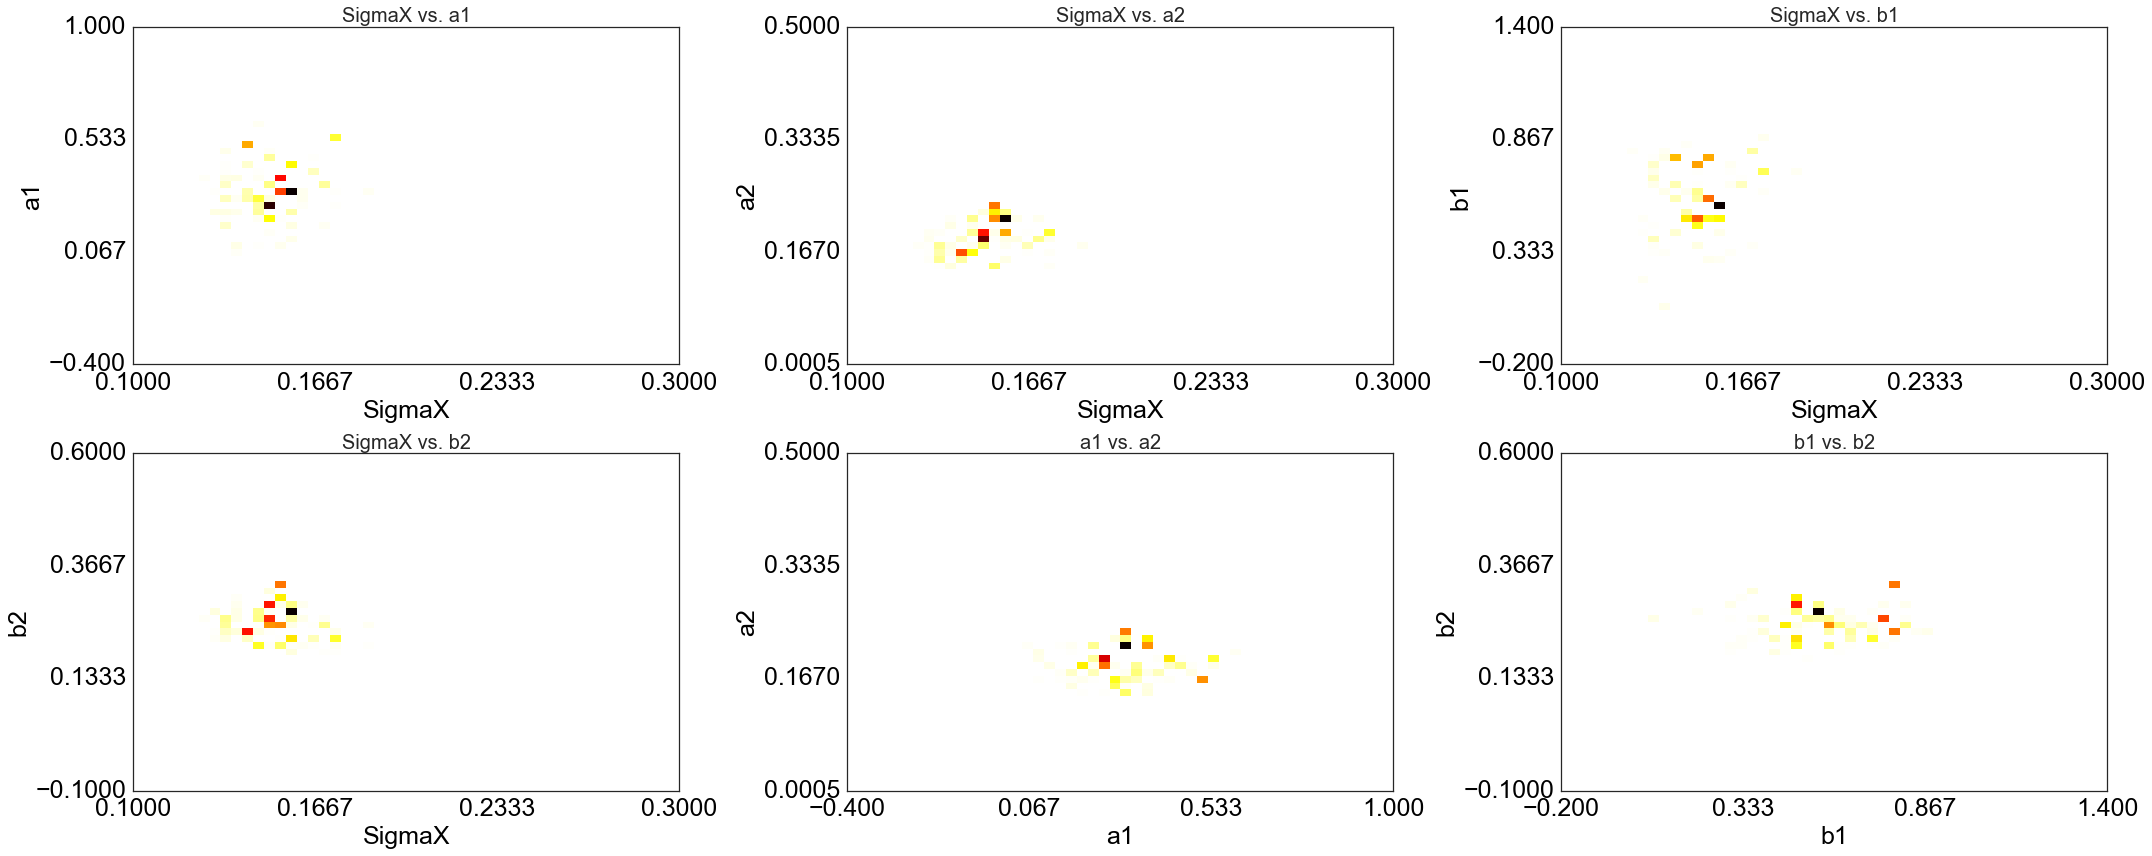

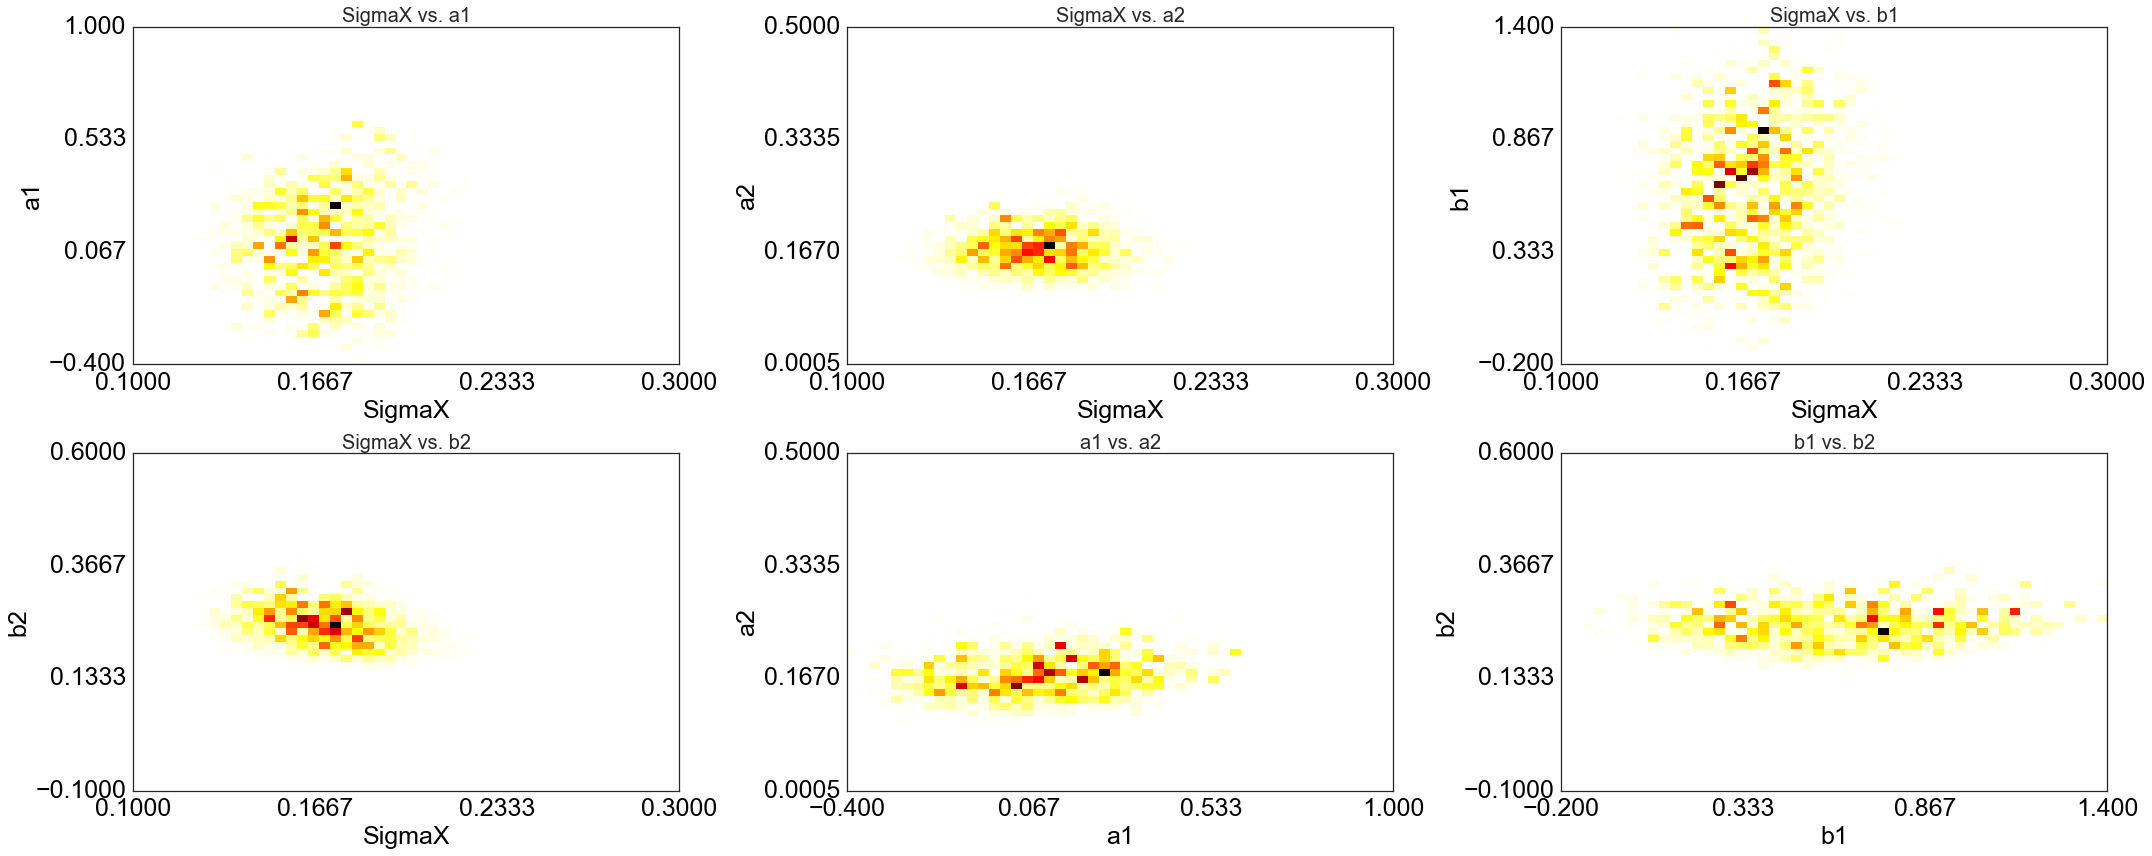

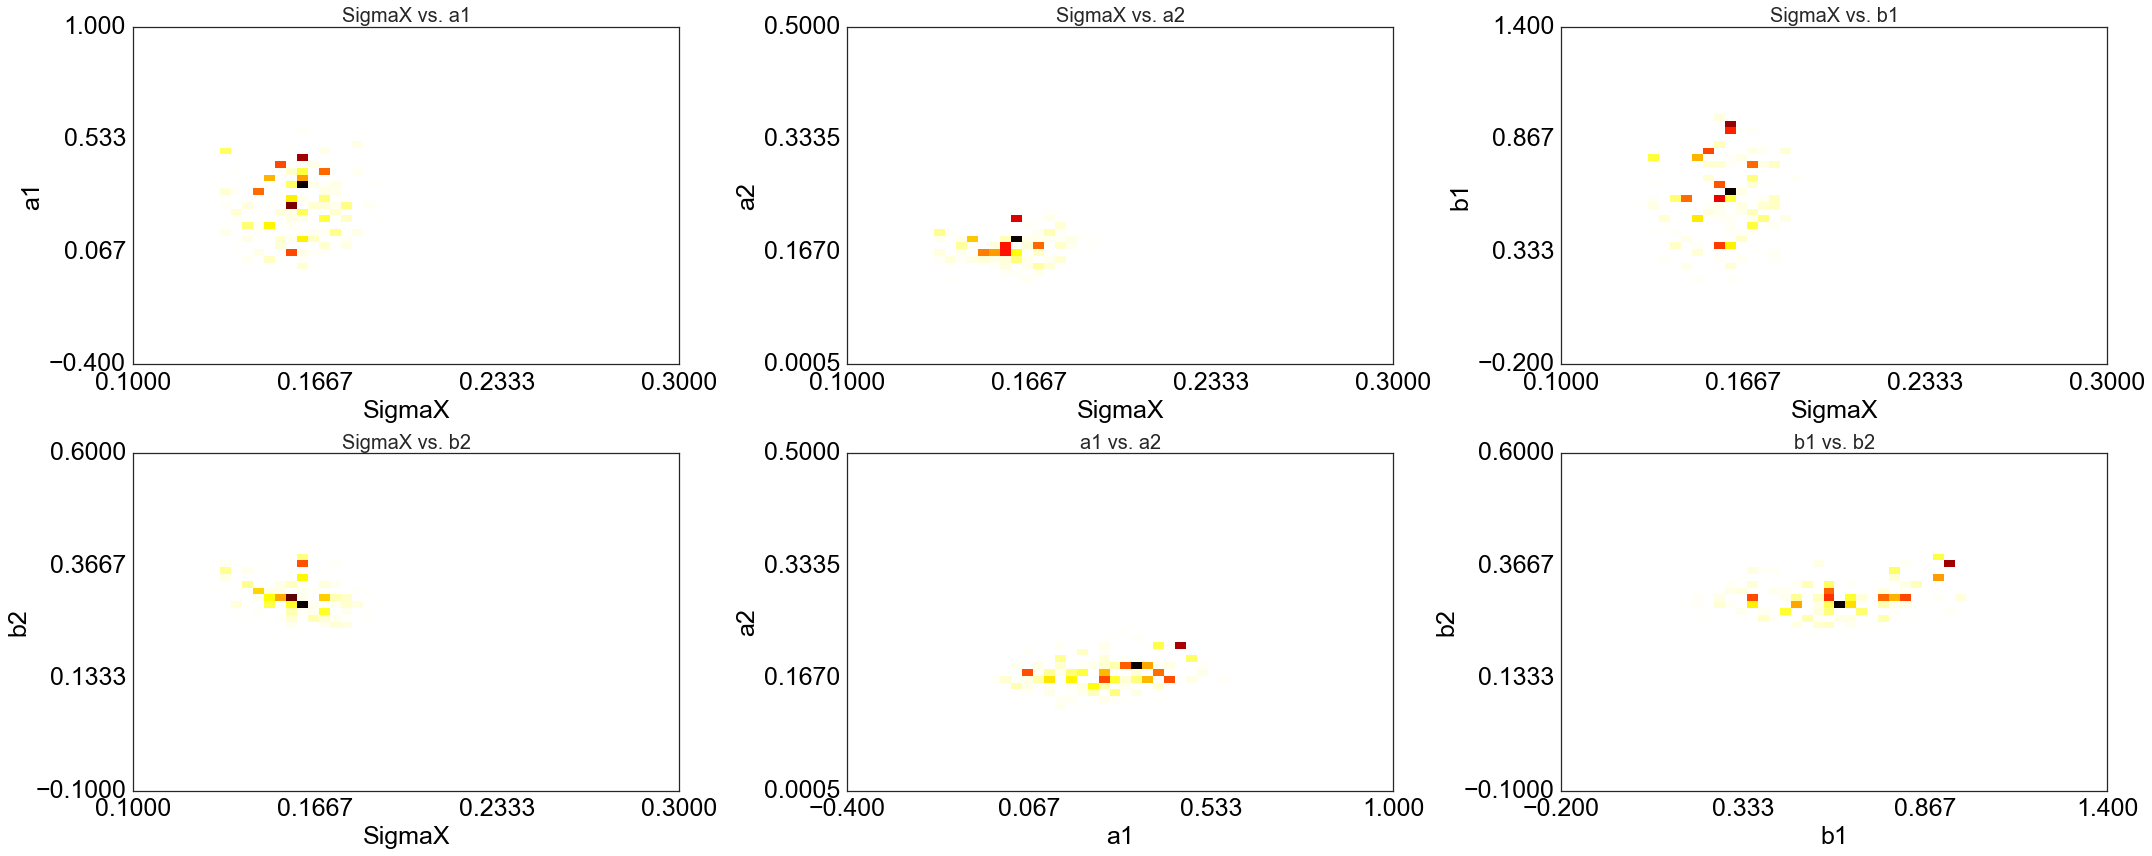

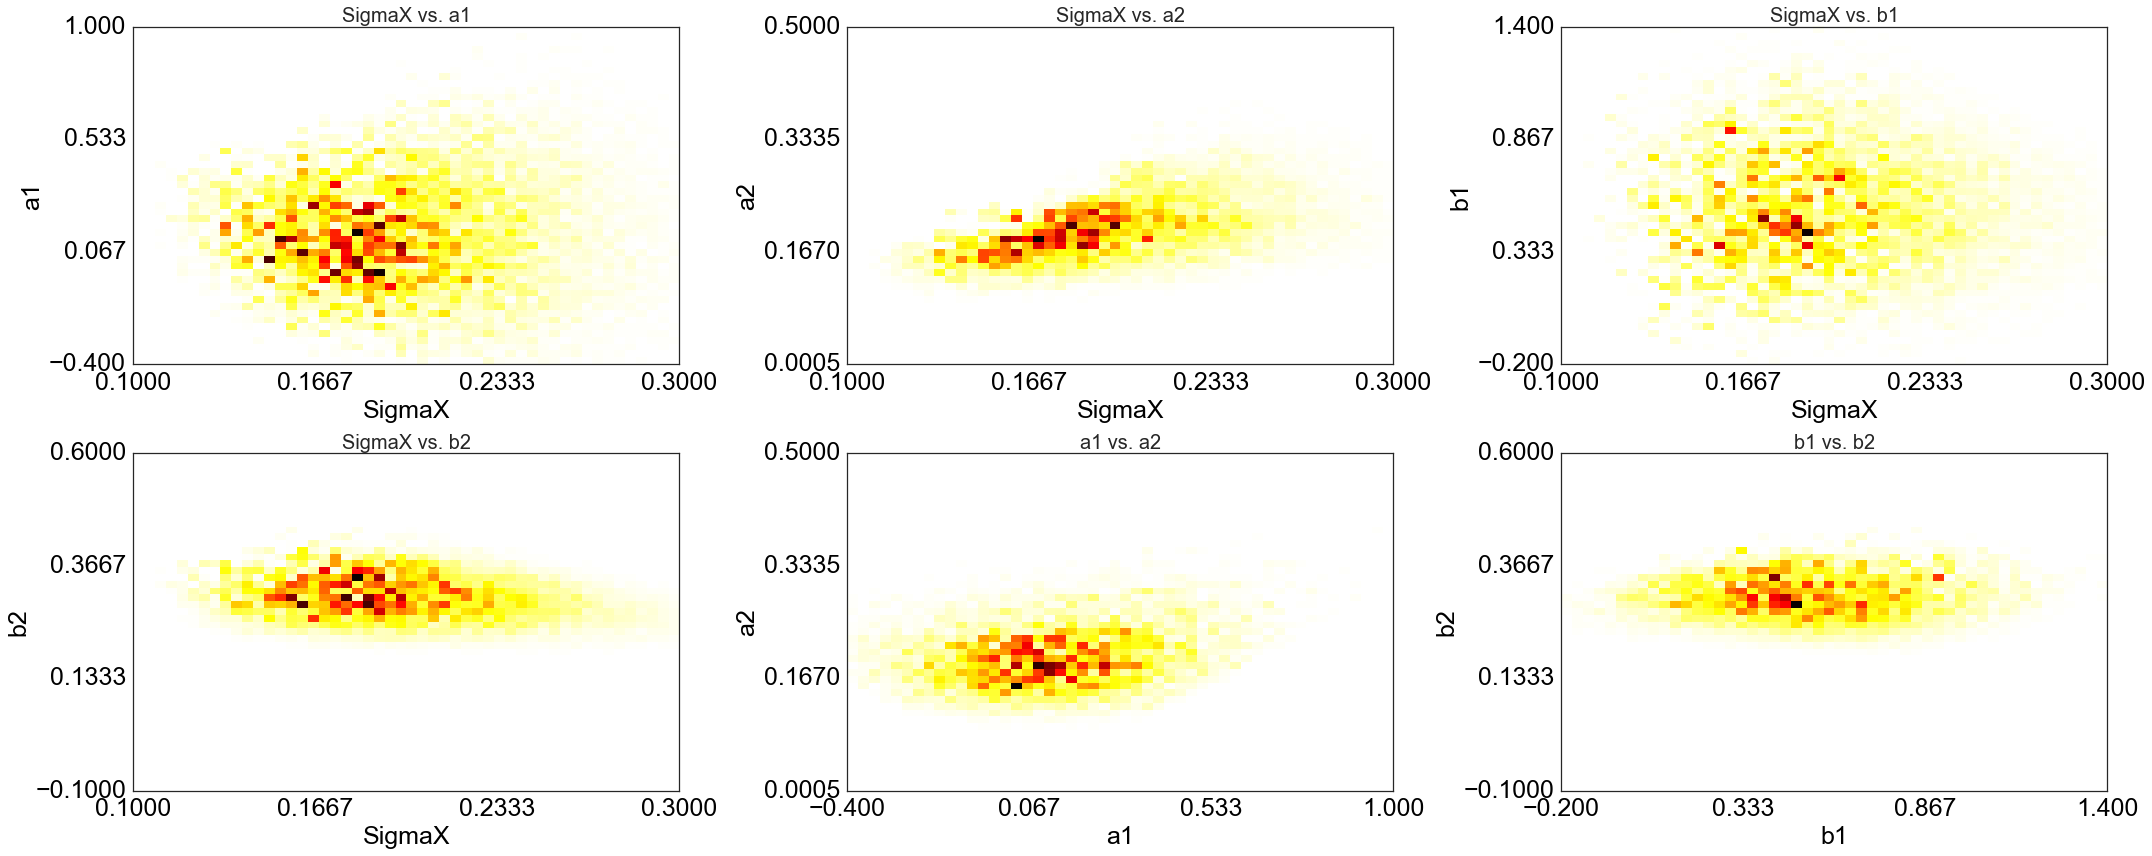

In [22]:
sample = sims
for target in ['C12','Al27','Fe56','Pb208']:    
    fig = plt.figure(figsize=(30,12))
    for i,parameter_i,parameter_j in zip(range(6)
                                               ,['SigmaX','SigmaX','SigmaX','SigmaX','a1','b1']
                                               ,['a1','a2','b1','b2','a2','b2']):
        print i,parameter_i + ' vs. ' + parameter_j
        ax = fig.add_subplot(2 ,3 , i+1)
        ax.set_title(parameter_i + ' vs. ' + parameter_j,fontsize=20)
        plot_2d_hist(sample['gen_'+parameter_i],sample['gen_'+parameter_j],weights=sample['ks_PvalTotal_'+target]
                     ,xlabel=parameter_i,ylabel=parameter_j,ax=ax);
    plt.tight_layout()

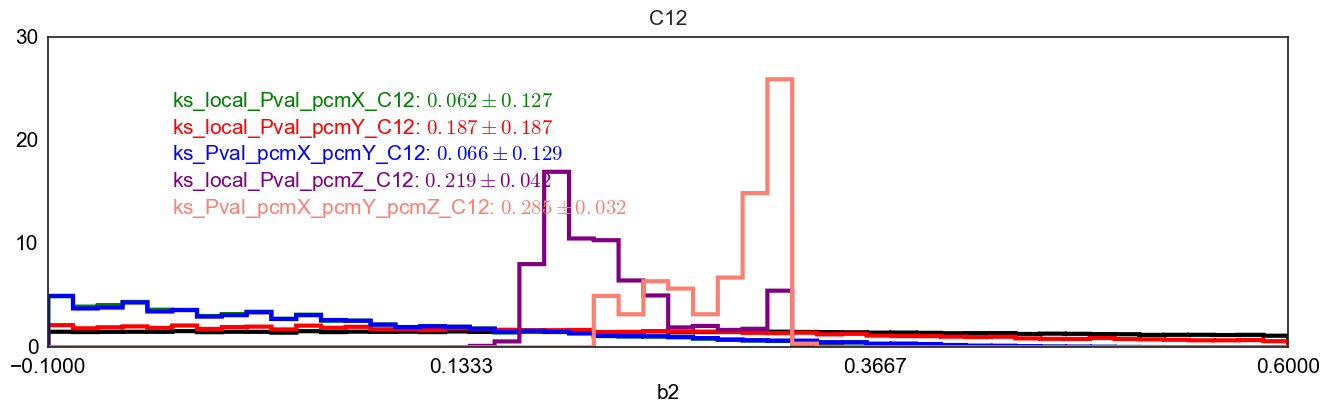

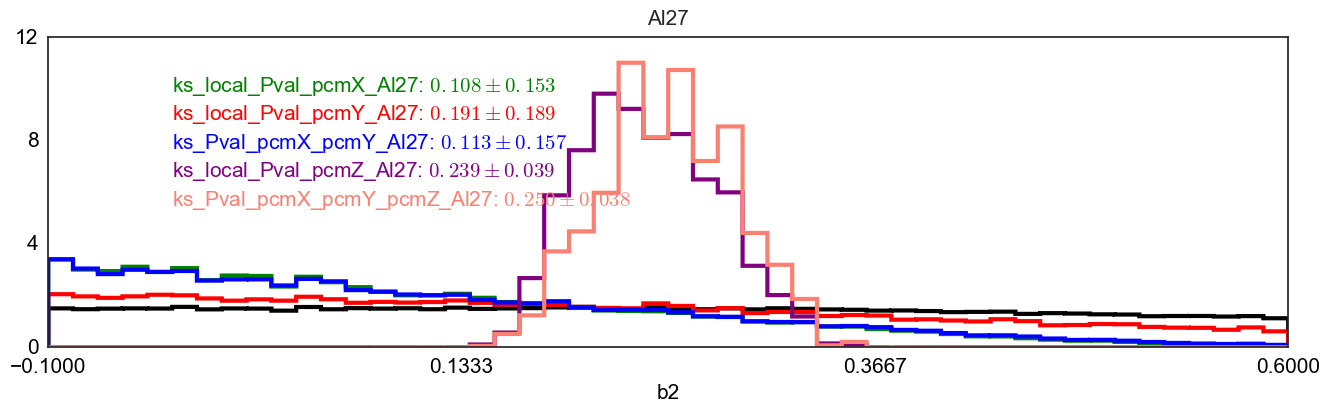

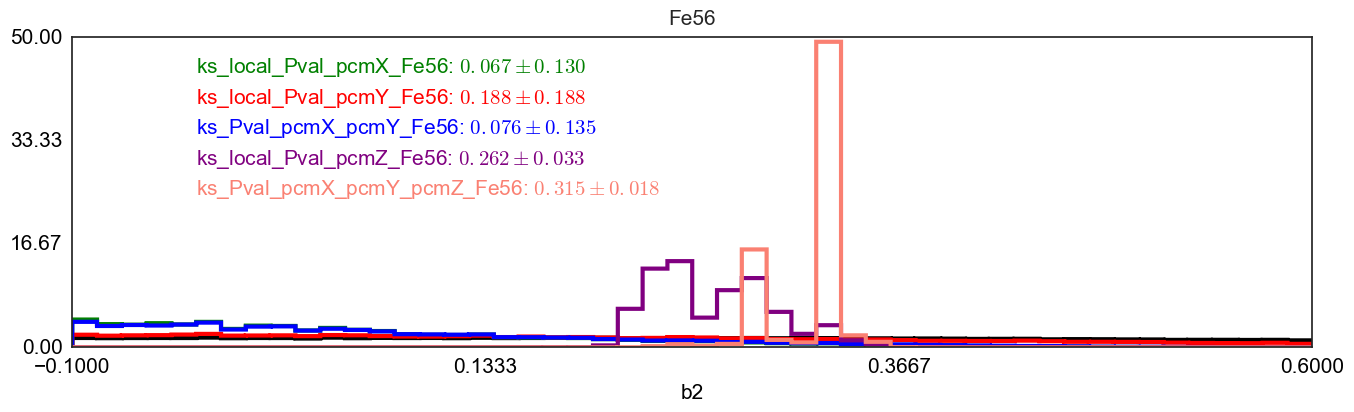

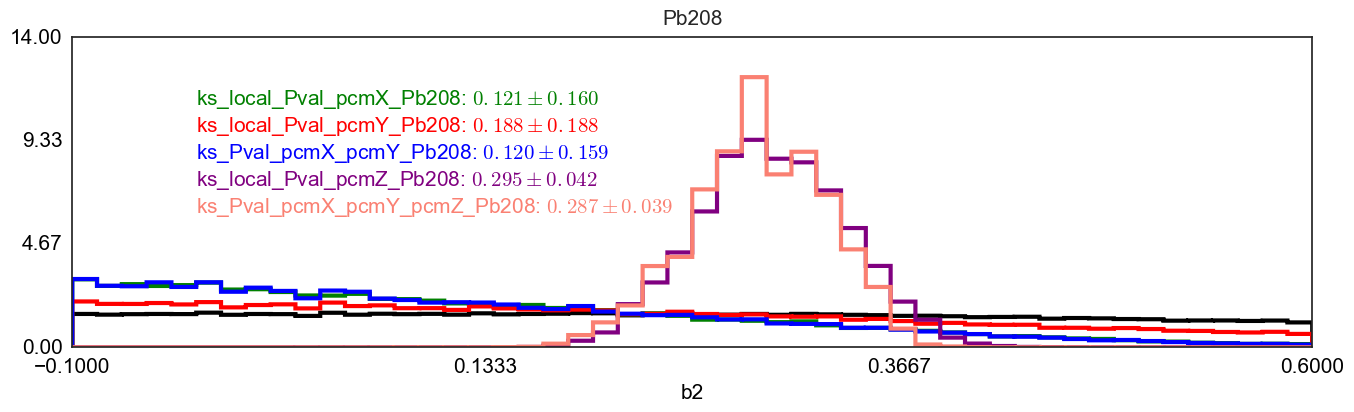

In [240]:
# sample = sims
for target in ['C12','Al27','Fe56','Pb208']:    
    fig,ax = plt.subplots(figsize=(16,4))
    parameter = 'b2'
    x = sample['gen_'+parameter]
    h,bins,_=plt.hist(x,bins=50,normed=1,histtype='step',linewidth=3,color='black')
    weights_array = ['ks_local_Pval_pcmX_'+target,'ks_local_Pval_pcmY_'+target,'ks_Pval_pcmX_pcmY_'+target,'ks_local_Pval_pcmZ_'+target,'ks_Pval_pcmX_pcmY_pcmZ_'+target]
    colors = ['green','red','blue','purple','salmon','black','cyan','yellow']
    y_max,mu,sigma=0,[],[]
    for i,weights_name,color in zip(range(len(weights_array)),weights_array,colors):
        weights = sample[weights_name]
        if np.sum(weights)>0:
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1,histtype='step',linewidth=3,color=color);
            if np.max(h)>y_max: y_max=np.max(h)
            mu.append(np.average(x , weights=weights))
            sigma.append(np.sqrt(np.average((x-mu[-1])**2, weights=weights)))
    for i,weights_name,color in zip(range(len(mu)),weights_array,colors):
        plt.text(np.min(bins)+0.1*(np.max(bins)-np.min(bins)),(1-0.1*(i+1))*y_max,weights_name+': $%.3f\\pm%.3f$'%(mu[i],sigma[i]),fontsize=15,color=color)

    set_axes(ax,x_label=parameter,fontsize=15)
    ax.set_title(target,fontsize=15,y=1.02)    

In [215]:
cm_pars['C12']

,EvtsInBin,good_bin,mean_tErr_unweighted,mean_tErr_weighted,mean_t_unweighted,mean_t_weighted,mean_xErr_unweighted,mean_xErr_weighted,mean_x_unweighted,mean_x_weighted,...,sigma_x_unweighted,sigma_x_weighted,sigma_yErr_unweighted,sigma_yErr_weighted,sigma_y_unweighted,sigma_y_weighted,sigma_zErr_unweighted,sigma_zErr_weighted,sigma_z_unweighted,sigma_z_weighted
0,71,True,0.014444,0.014444,0.203972,0.203972,0.020623,0.020623,-0.005411,-0.005411,...,0.173788,0.173788,0.013391,0.013391,0.159660,0.159660,0.012941,0.012941,0.154164,0.154164
1,143,True,0.008821,0.008899,0.191048,0.192069,0.012318,0.012456,-0.037495,-0.036376,...,0.147308,0.147911,0.009184,0.009313,0.155351,0.156437,0.007859,0.007951,0.132934,0.133533
2,132,True,0.010388,0.010194,0.226333,0.223975,0.015259,0.015279,-0.012516,-0.010800,...,0.175321,0.174892,0.011434,0.011226,0.185864,0.181792,0.009643,0.009687,0.156736,0.156849
3,96,True,0.011044,0.011028,0.197337,0.195628,0.016787,0.016942,-0.008092,-0.008941,...,0.164495,0.165145,0.011060,0.010877,0.153227,0.149889,0.012114,0.012219,0.167935,0.168496
4,56,True,0.014849,0.015344,0.231434,0.232065,0.022118,0.022452,-0.025600,-0.027392,...,0.165535,0.165006,0.018321,0.018837,0.194256,0.195978,0.022976,0.023555,0.240952,0.243135


In [18]:
f1 = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/SRC_e1_C.root' )
p1 = f1.Get('T')
f2 = ROOT.TFile('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/SRC_e2_C.root' )
p2 = f2.Get('T')
# p2 = TPlots(path + '/DATA/SRC_e2_C.root' , 'T')
evtsgen_PmissBins = []
for i in range(5):
    pmin , pmax = PmissBins[i][0] , PmissBins[i][1]
    p_cut = ("%f<Pmiss_size && Pmiss_size<%f"%(pmin , pmax))
    evtsgen_PmissBins.append( 20. * (p1.GetEntries(p_cut) + p2.GetEntries(p_cut)) )
    print evtsgen_PmissBins[-1]

93540.0
49820.0
31620.0
15200.0
9160.0


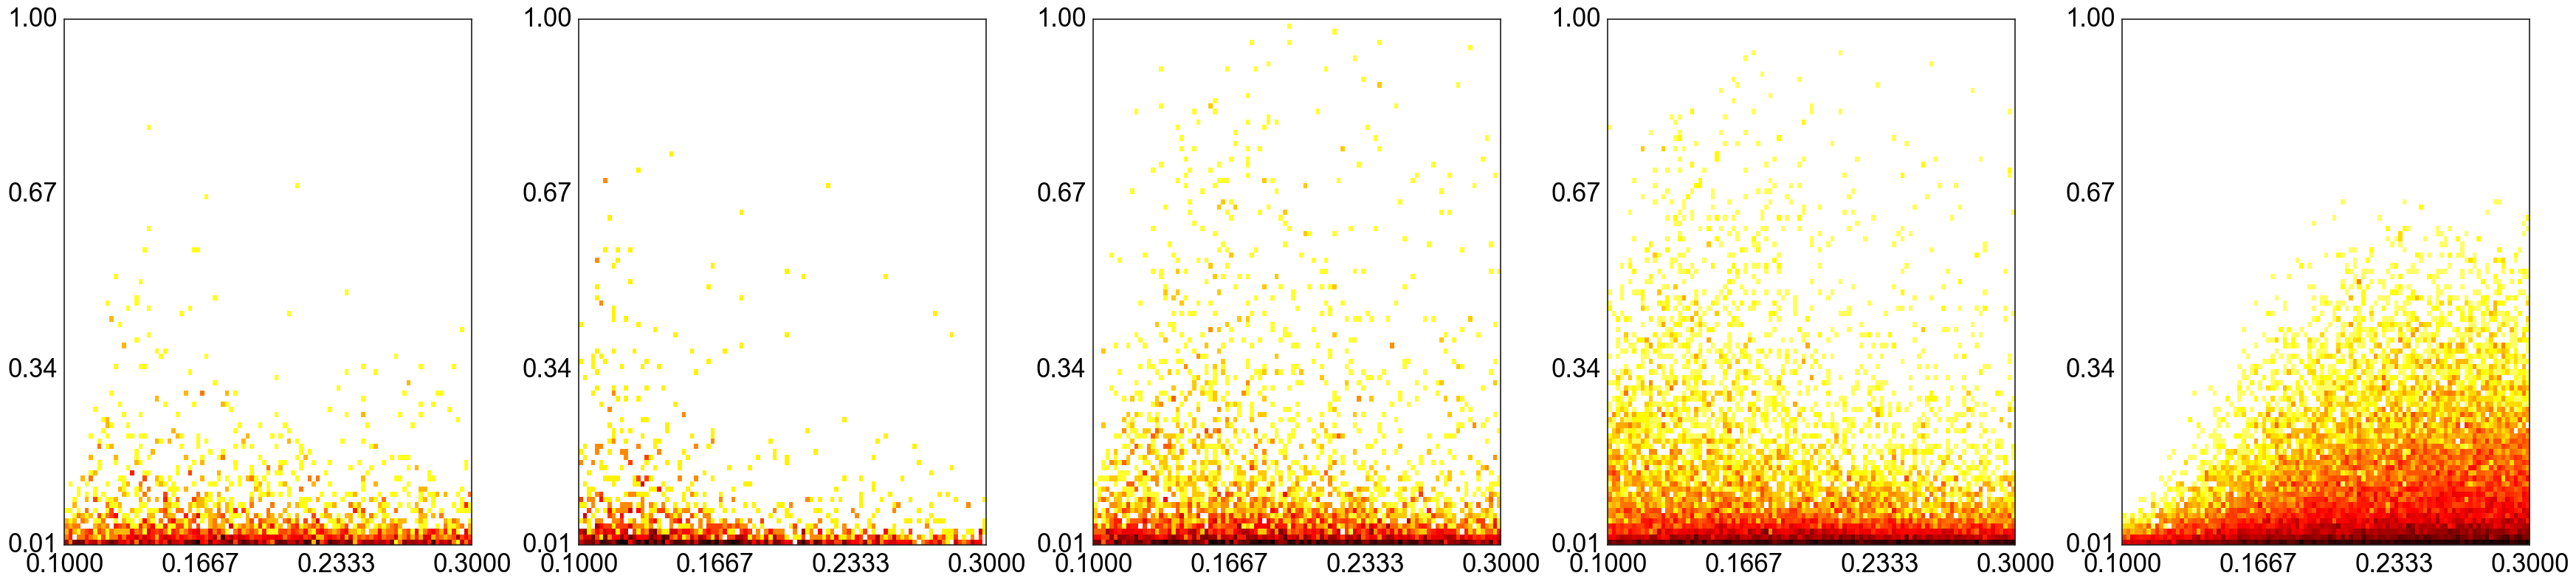

In [239]:
sample = sims
fig=plt.figure(figsize=(35,8))
for i in range(5):
    ax = fig.add_subplot(1,5,i+1)
#     plot_2d_hist(sample['gen_b2'],sample['EvtsInBin_bin%d'%i],ax=ax);
#     plot_2d_hist(sample['gen_b2'],sample['ks_local_Pval_pcmZ_bin%d_C12'%i],ax=ax,norm='log'
#                  ,bins=(np.linspace(-0.1,0.6,100),np.linspace(0.01,1.,100)));
    plot_2d_hist(sample['gen_SigmaX'],sample['ks_local_Pval_pcmZ_bin%d_C12'%i],ax=ax,norm='log'
                 ,bins=(np.linspace(0.1,0.3,100),np.linspace(0.01,1.,100)));


#     NevtsData = cm_pars['C12'].get_value(i,'EvtsInBin')
#     xlim = ax.get_xlim()
#     plt.plot([xlim[0],xlim[1]],[20*NevtsData,20*NevtsData],'--')
#     ax.set_title(np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i]),fontsize=20)
#     ax.set_ylim(0.1,1)
# print np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmX_C12'])
plt.tight_layout()
# fig=plt.figure(figsize=(35,8))
# for i in range(5):
#     ax = fig.add_subplot(1,5,i+1)
#     plot_2d_hist(sample['gen_b2'],sample['EvtsInBin_bin%d'%i],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i],ax=ax);
#     NevtsData = cm_pars['C12'].get_value(i,'EvtsInBin')
#     xlim = ax.get_xlim()
#     plt.plot([xlim[0],xlim[1]],[20*NevtsData,20*NevtsData],'--')
#     ax.set_title(np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i]))
# #     ax.set_ylim(0,evtsgen_PmissBins[i])
# plt.tight_layout()
# fig=plt.figure(figsize=(35,8))
# for i in range(5):
# #     weights=sample['ks_local_Pval_pcmZ_bin%d_C12'%i]
#     weights=sample['ks_PvalTotal_Al27']
#     ax = fig.add_subplot(1,5,i+1)
#     loss = (evtsgen_PmissBins[i]-sample['EvtsInBin_bin%d'%i]).astype(float)/evtsgen_PmissBins[i]
#     ax.scatter(weights,sample['EvtsInBin_bin%d'%i]);
# #     ax.set_ylim(0.4,1);
# #     ax.set_xlim(0,1.e-5)
#     ax.set_title(np.average(sample['gen_b2'],weights=sample['ks_local_Pval_pcmZ_bin%d_Al27'%i]))
plt.tight_layout()

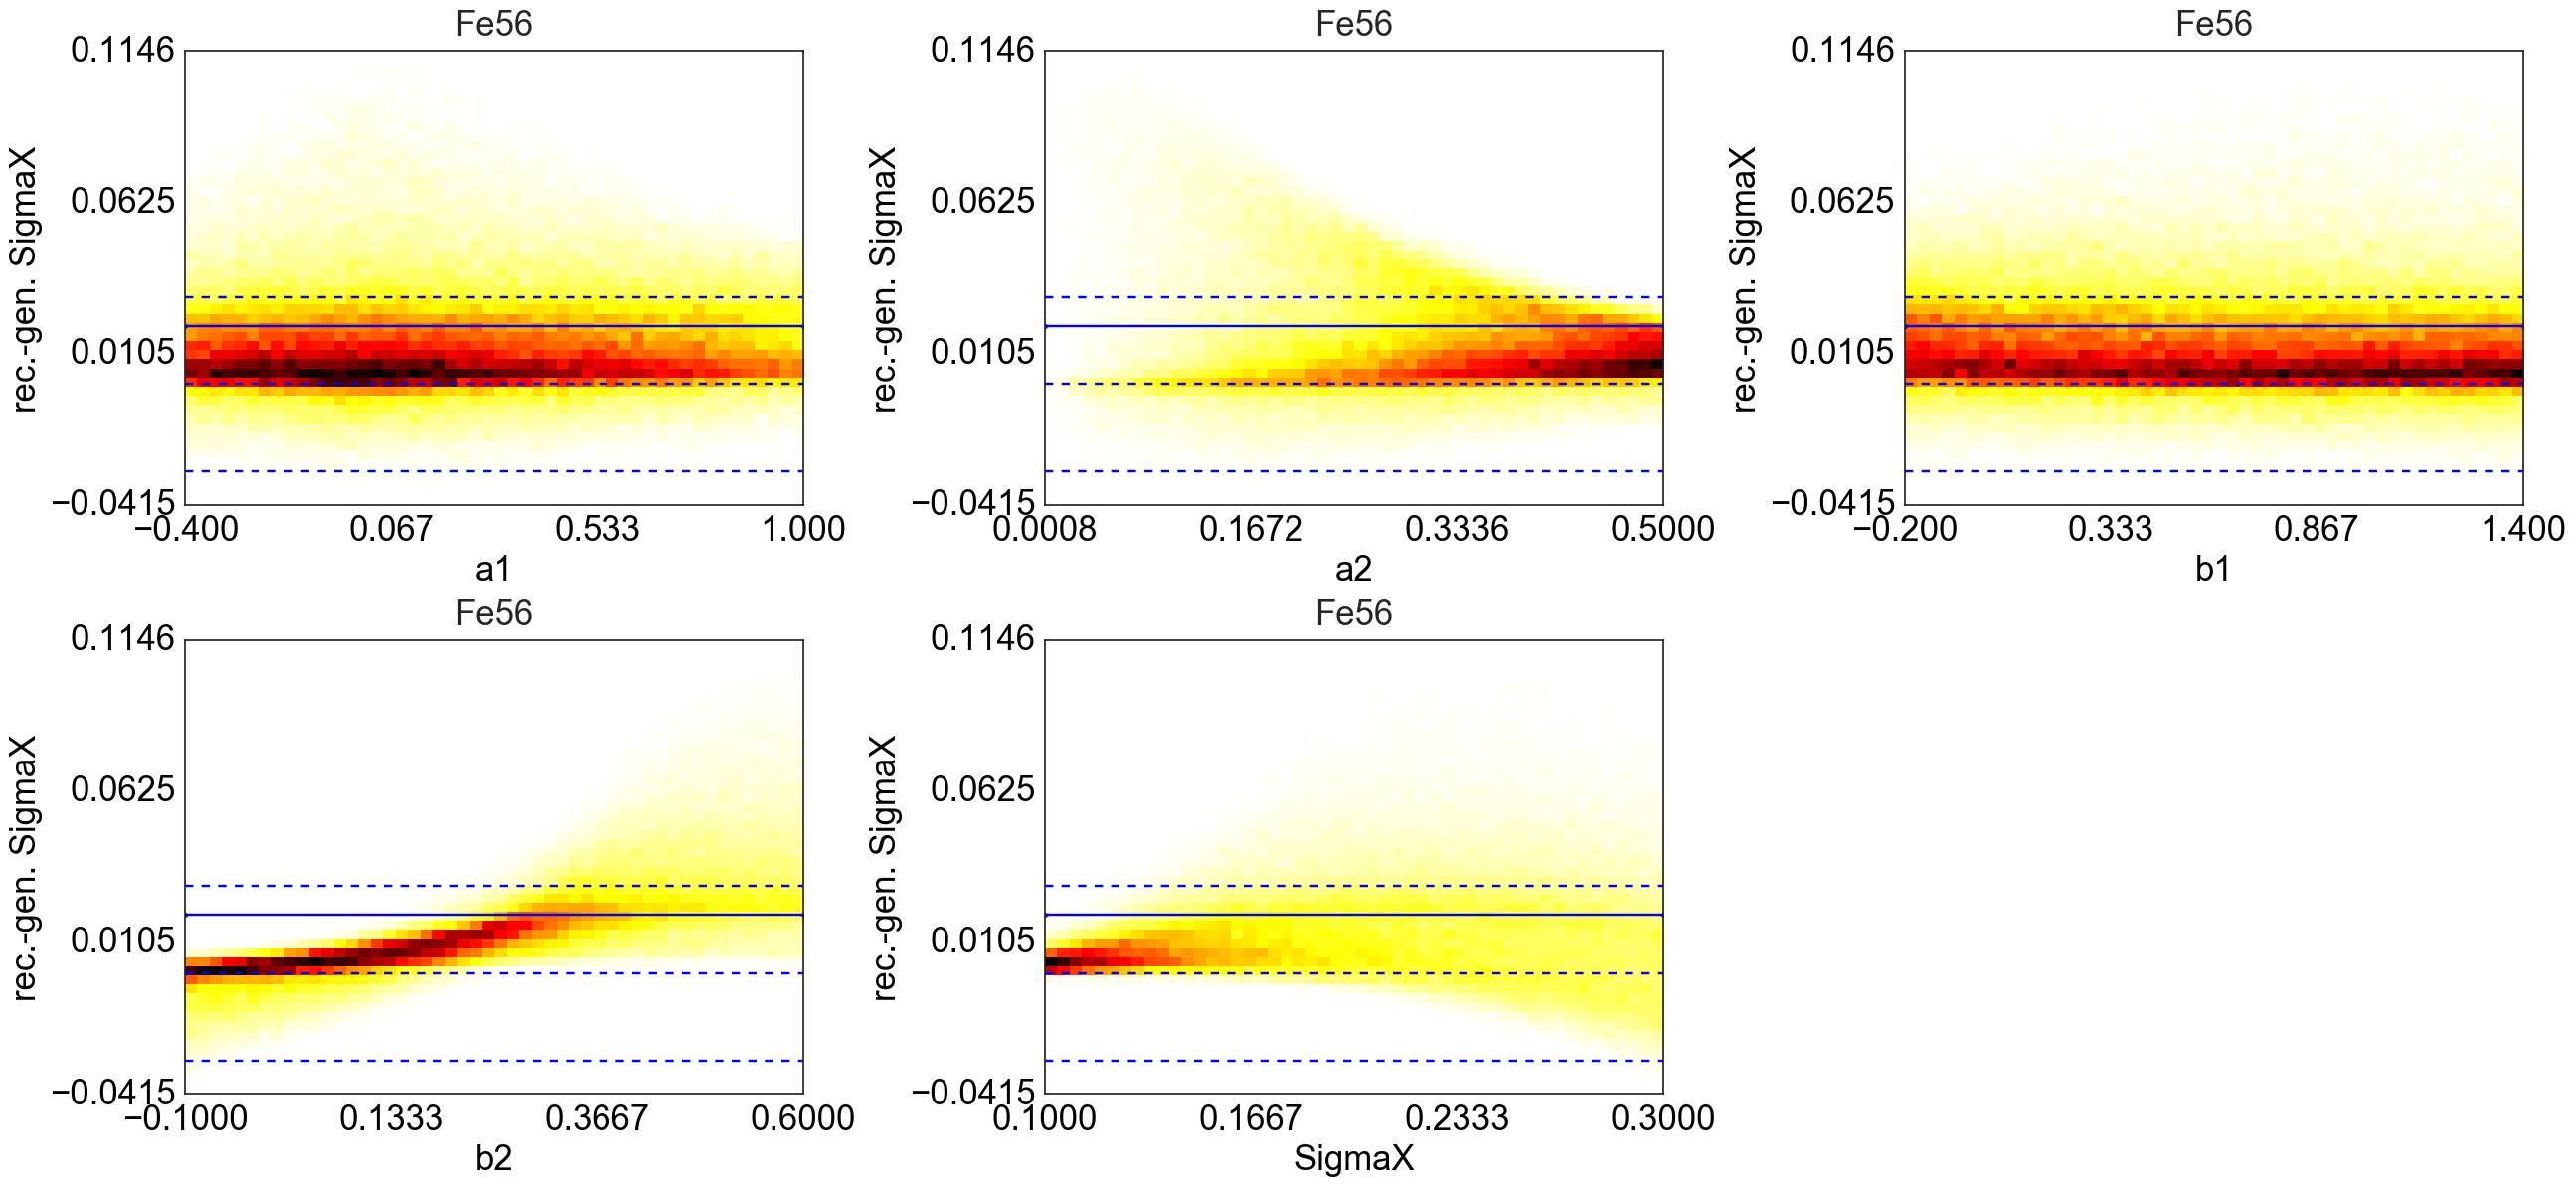

In [221]:
norm=''
# for target in ['C12']:#,'Al27','Fe56','Pb208']:

#     fig=plt.figure(figsize=(26,12))
#     for i,parx,pary in zip(range(6),
#                            ['a1','b1','SigmaX','SigmaX','SigmaX','SigmaX'],                         
#                            ['a2','b2','a1','a2','b1','b2']):
#         if i<2: ax = fig.add_subplot(2,4,(2*i+1,2*i+2))
#         else: ax = fig.add_subplot(2,4,3+i)
#         varx,vary,w = parx,pary, 'ks_Pval_pcmX_pcmY_pcmZ_scaled_1T_'+target#'ks_Pval_pcmX_pcmY_pcmZ_scaled_1T_'+target
#         plot_2d_hist(sample['gen_'+varx],sample['gen_'+vary],weights=sample[w],xlabel=parx,ylabel=pary,ax=ax,norm=norm)
# #         plot_2d_hist(sample['gen_'+varx],sample['gen_'+vary],xlabel=parx,ylabel=pary,ax=ax,norm=norm)
        
#         ax.set_title(target,fontsize=25,y=1.02)
#         plt.tight_layout()
                
samlpe=sims
for target in ['Fe56']:#,'Al27','Fe56','Pb208']:

    fig=plt.figure(figsize=(26,12))
    for i,parx in zip(range(6),
                           ['a1','a2','b1','b2','SigmaX']):
        ax = fig.add_subplot(2,3,i+1)
#         plot_2d_hist(sample['gen_'+parx],sample['rec'+parx]-sample['gen_'+parx],xlabel=parx,ylabel='rec. - gen. '+parx,ax=ax,norm=norm)        
        plot_2d_hist(sample['gen_'+parx],sample['recSigmaX']-sample['gen_SigmaX'],xlabel=parx,ylabel='rec.-gen. SigmaX',ax=ax,norm=norm)
#         plot_2d_hist(sample['gen_'+parx],sample['recSigmaX']-sample['gen_SigmaX'],weights=sample['ks_Pval_pcmX_pcmY_pcmZ_scaled_1T_'+target],xlabel=parx,ylabel='rec.-gen. SigmaX',ax=ax,norm=norm)
        xlim=ax.get_xlim()
        plt.plot(xlim,[-0.03,-0.03],'--',color='blue')
        plt.plot(xlim,[0.,0.],'--',color='blue')
        plt.plot(xlim,[0.02,0.02],'.-',color='blue')
        plt.plot(xlim,[0.03,0.03],'--',color='blue')

        ax.set_title(target,fontsize=25,y=1.02)
    plt.tight_layout()
#     fig.savefig("/Users/erezcohen/Desktop/recSigmaX_vs_all.pdf")

-0.0170418665306


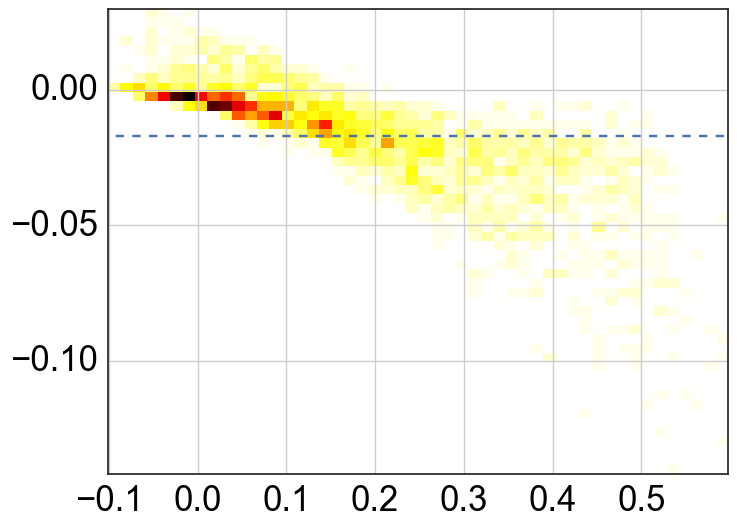

In [157]:
fig,ax=plt.subplots(figsize=(8,6))
weights=None#sims.ks_local_Pval_pcmZ_bin2_C12 #
plot_2d_hist( sims.rec_b2 , sims.gen_SigmaX - sims.recSigmaX  ,  ax=ax , weights=weights);
average = np.average( sims.gen_SigmaX - sims.recSigmaX  , weights=weights)
print average
plt.plot([-1,1],[average,average],'--')
ax.grid()

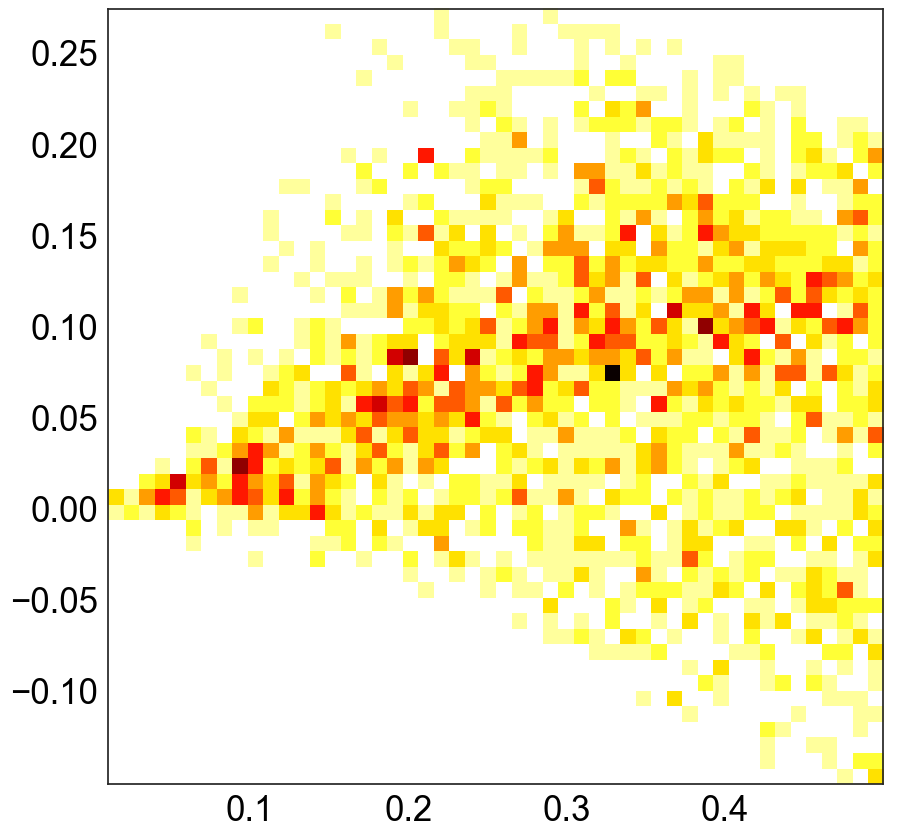

In [160]:
plot_2d_hist( sims.gen_a2 , sims.gen_b2 - sims.rec_b2  , weights=None);

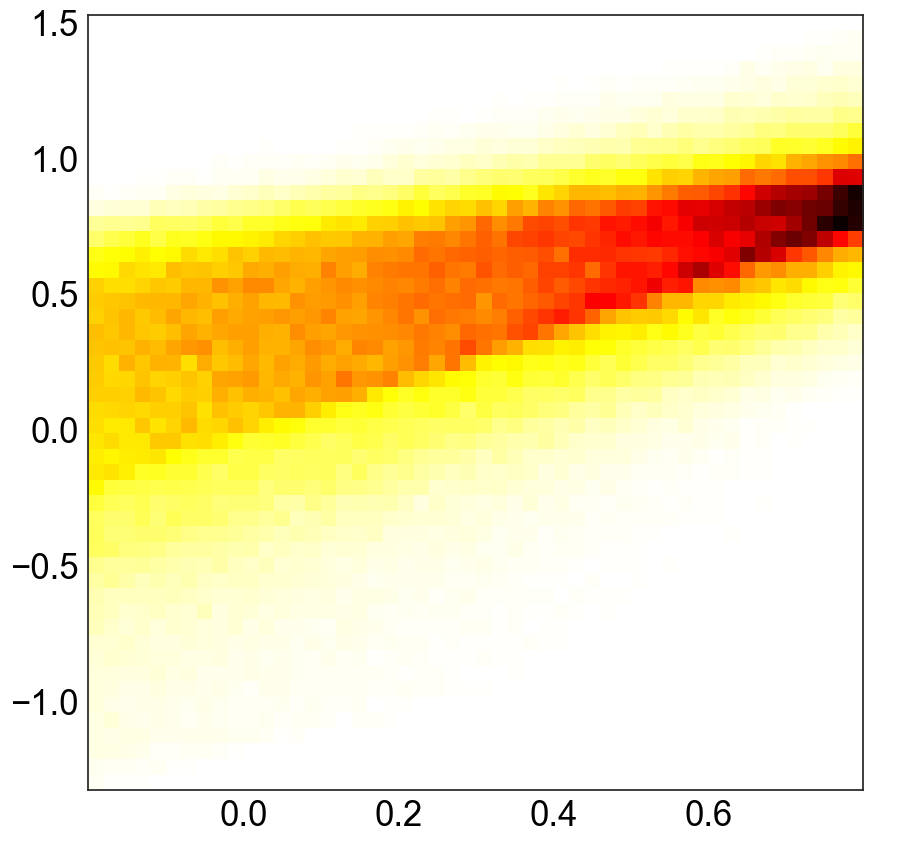

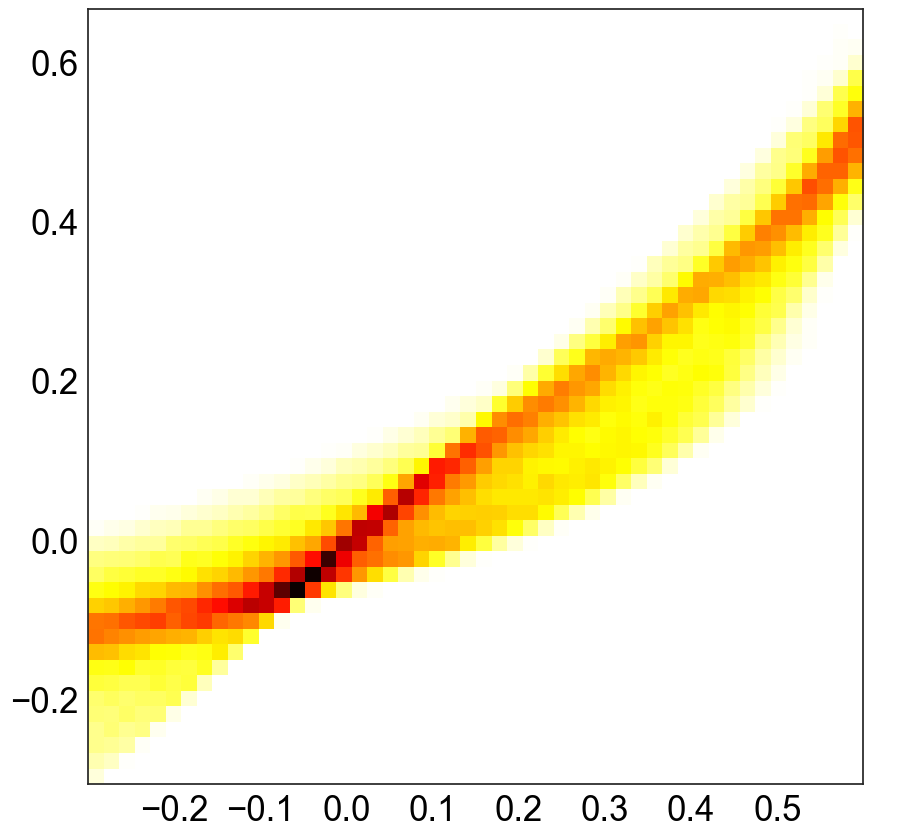

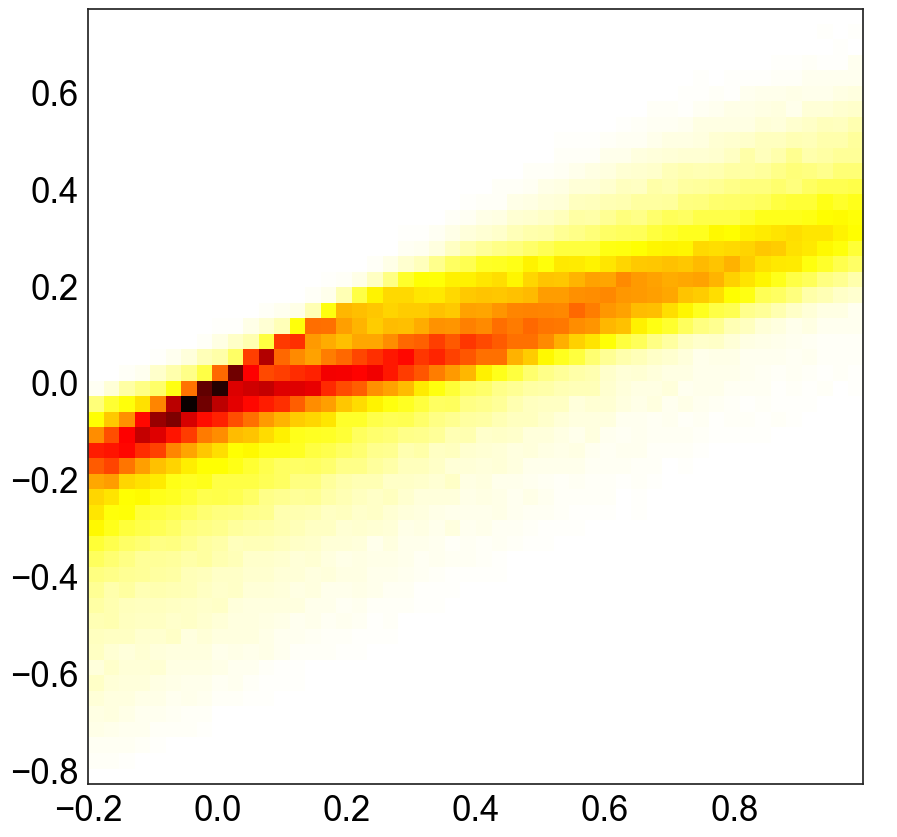

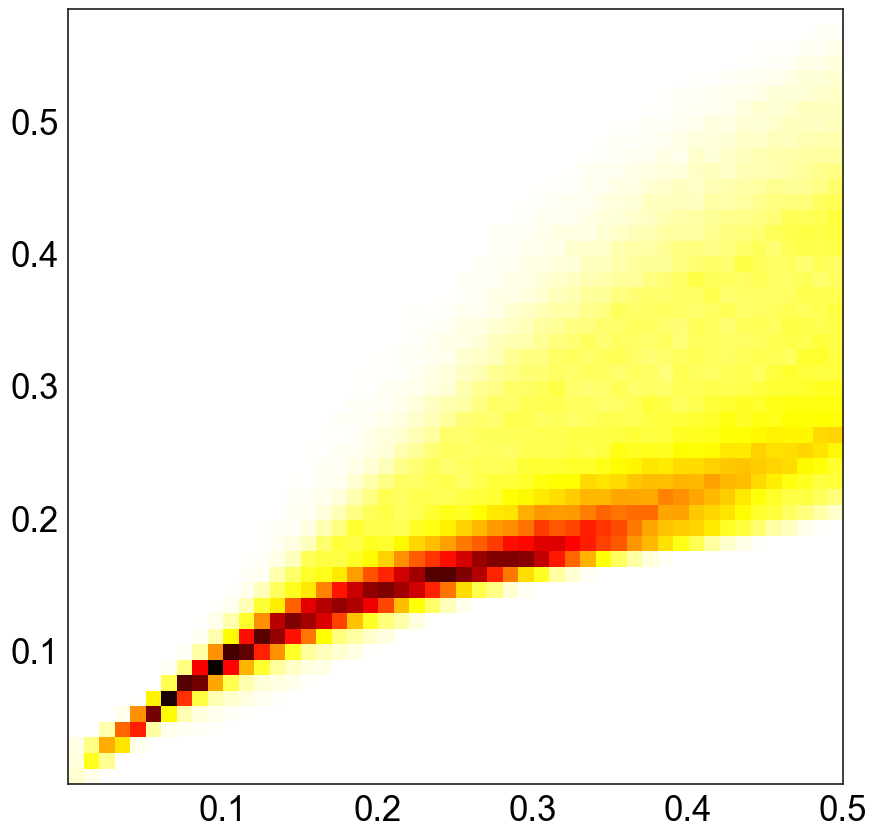

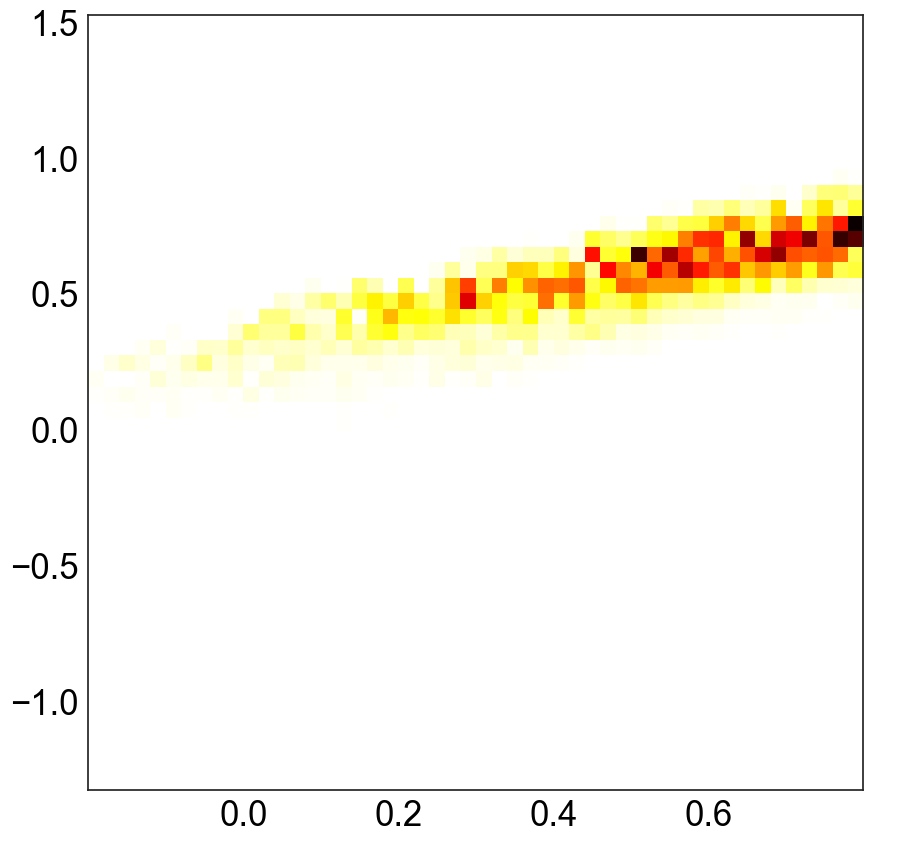

In [61]:
plot_2d_hist(sims[sims['rec_b1']>-100].gen_b1,sims[sims['rec_b1']>-100].rec_b1, norm='');
plot_2d_hist(sims[sims['rec_b2']>-100].gen_b2,sims[sims['rec_b2']>-100].rec_b2, norm='');
plot_2d_hist(sims[sims['rec_a1']>-100].gen_a1,sims[sims['rec_a1']>-100].rec_a1, norm='');
plot_2d_hist(sims[sims['rec_a2']>-100].gen_a2,sims[sims['rec_a2']>-100].rec_a2, norm='');
plot_2d_hist(sims[sims['rec_b1']>-100].gen_b1,sims[sims['rec_b1']>-100].rec_b1,weights=sims[sims['rec_b1']>-100].ks_PvalTotal_Al27, norm='');

[0.0, 0.99758600000000008]


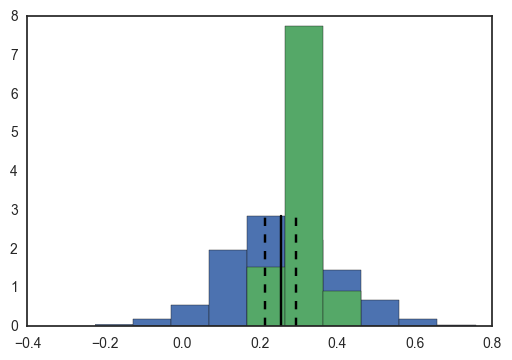

In [99]:
target,i_bin = 'Al27',4
# h,_,_=plt.hist(sims['recmean_z_pmiss_0.750_1.000'])
h,bins,_=plt.hist(sims['recmean_z_bin%d'%i_bin],normed=1)
plt.hist(sims['recmean_z_bin%d'%i_bin],weights=sims['ks_PvalTot_allPvals_'+target],bins=bins,normed=1)
# 12C mean of the distribution in this bin:
dataCMparameters = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/'+target+'_dataCMparameters.csv')
par, parErr = dataCMparameters.get_value(i_bin,'mean_z_unweighted'), dataCMparameters.get_value(i_bin,'mean_zErr_unweighted')
x = sims['ks_local_Pval_pcmZ_bin%d_%s'%(i_bin,target)]
print [np.min(x), np.max(x)]
plt.plot([par,par],[0,np.max(h)],color='black');
plt.plot([par+parErr,par+parErr],[0,np.max(h)],'--',color='black');
plt.plot([par-parErr,par-parErr],[0,np.max(h)],'--',color='black');